<a href="https://colab.research.google.com/github/PratibhaPachare/PROJECT-HOUSE-PRICE-PREDICTION/blob/main/Chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement-
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Minimum Requirements-
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [ ]:
from google.colab import files
files.upload()

Saving train-chennai-sale.csv to train-chennai-sale (7).csv


{'train-chennai-sale.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score, mean_absolute_error,mean_squared_error,mean_squared_log_error)
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
df=pd.read_csv("train-chennai-sale.csv")
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [ ]:
#Number of rows and coloumn in df
df.shape

(7109, 22)

In [ ]:
# Description of the Dataset.
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

Inferences:
Minimum and maximum number of Rooms available are 2 and 6 respectively.
Minimum and maximum number of Bedrooms available are 1 and 4 respectively.
Minimum and maximum number of Bathrooms available are 1 and 2 respectively.
Minimum and maximum Sales price of the houses range from a minimum of 2.156875e+06 to a maximum of 2.366734e+07.


In [ ]:
#checking for missing values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

There are missing values in N_BEDROOM , N_BATHROOM , QS_OVERALL coloumns 

In [ ]:
#checking datatype of coloumn where missing values are present
print(df.dtypes[["N_BEDROOM","N_BATHROOM","QS_OVERALL"]])

N_BEDROOM     float64
N_BATHROOM    float64
QS_OVERALL    float64
dtype: object


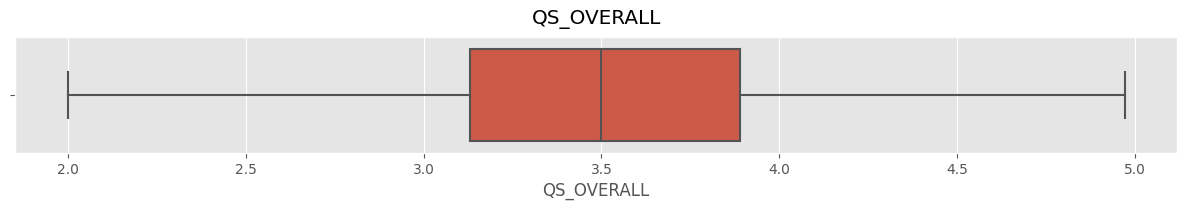

In [ ]:
# Boxplot for 'QS_OVERALL' column.
plt.figure(figsize=(15,1.5))
plt.title("QS_OVERALL",va='bottom')
sns.boxplot(df.QS_OVERALL)
plt.show()

Inference From the above graph: As there are no outliers in the "QS_OVERALL" column, we will replace the missing values in "QS_OVERALL" column with it's mean value.

In [ ]:
#treating the missing values
df=df.fillna({"N_BEDROOM":df["N_BEDROOM"].mode()[0], "N_BATHROOM":df["N_BATHROOM"].mode()[0],"QS_OVERALL":df["QS_OVERALL"].mean()})

In [ ]:
 #converting the datatype of N_BEDROOM, N_BATHROOM coloumn into integer
df["N_BEDROOM"] = df["N_BEDROOM"].astype(int) 
df["N_BATHROOM"] = df["N_BATHROOM"].astype(int)

In [ ]:
#getting information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Converting date time values into date time objects

In [ ]:
#Converting "DATE_SALE" and "DATE_BUILD" coloumn to datetime format
df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])
df["DATE_BUILD"] = pd.to_datetime(df["DATE_BUILD"])

In [ ]:
#checking the type of both coloumn
print(df.dtypes[["DATE_SALE" , "DATE_BUILD"]])

DATE_SALE     datetime64[ns]
DATE_BUILD    datetime64[ns]
dtype: object


To calculate the age of building,
Building age = date of sale - date of build


In [ ]:
# Output will be a pandas Series with DateTime objects as values.
AGE = df['DATE_SALE'] - df['DATE_BUILD']
AGE
# To convert DateTime objects in the Series to numerical(float) values.
AGE = AGE/np.timedelta64(1, 'Y') # difference w.r.t years
print(f"Data type of values in the AGE series : {AGE.dtype}\n")

# For better analysis let's round off the values and convert them into integer.
AGE = round(AGE).astype("int")



Data type of values in the AGE series : float64



In [ ]:
# Inserting the new column into the dataframe(as 2nd last column).
df.insert(loc=df.shape[1]-1, column="HOUSE_AGE", value=AGE)
# Values in the Age of the Building column
df["HOUSE_AGE"].head()


0    44
1    11
2    20
3    22
4    30
Name: HOUSE_AGE, dtype: int64

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'HOUSE_AGE', 'SALES_PRICE'],
      dtype='object')

Dropping the columns which  are not necessary for price prediction

In [ ]:
#dropping PRT_ID REG_FEE COMMIS
df.drop(columns=["PRT_ID", "REG_FEE", "COMMIS"], inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'HOUSE_AGE', 'SALES_PRICE'],
      dtype='object')

Extracting catagorical columns and spelling corrections

In [ ]:
#EXtracting categorical columns
df_cat1= df.select_dtypes(include=["object"])
print(f"Number of Categorical columns : {df_cat1.shape[1]}\n")
print("The categorical columns are :\n" , list(df_cat1.columns))

Number of Categorical columns : 7

The categorical columns are :
 ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


AREA Column

In [ ]:
#counting values in AREA column
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
#Spelling corrections and replacement in AREA column
#Replacing Chrompt, chrmpet, chormpet with Chrompet.
#Replacing Karapakkam with Karapakam.
#Replacing Velchery with Velachery.
#Replacing Ana Nagar, Ann Nagar with Anna Nagar.
#Replacing TNagar with T Nagar.
#Replacing Adyr with Adyar.
# KKNagar with KK Nagar.         

df["AREA"].replace({"Chrompt": "Chrompet", "Chrmpet":"Chrompet", "Chormpet": "Chrompet"},inplace =True)
df["AREA"].replace("Karapakam", "Karapakkam",inplace =True)
df["AREA"].replace("Velchery", "Velachery",inplace =True)
df["AREA"].replace({"Ana Nagar":"Anna Nagar", "Ann Nagar": "Anna Nagar"},inplace =True)
df["AREA"].replace("TNagar","T Nagar",inplace =True)
df["AREA"].replace("Adyr","Adyar",inplace =True)
df["AREA"].replace("KKNagar","KK Nagar",inplace =True)

In [ ]:
#counting values in AREA column after spelling correction and replacement
print(df.AREA.value_counts(),"\n")

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64 



Bar Plot for AREA Column

<function matplotlib.pyplot.show>

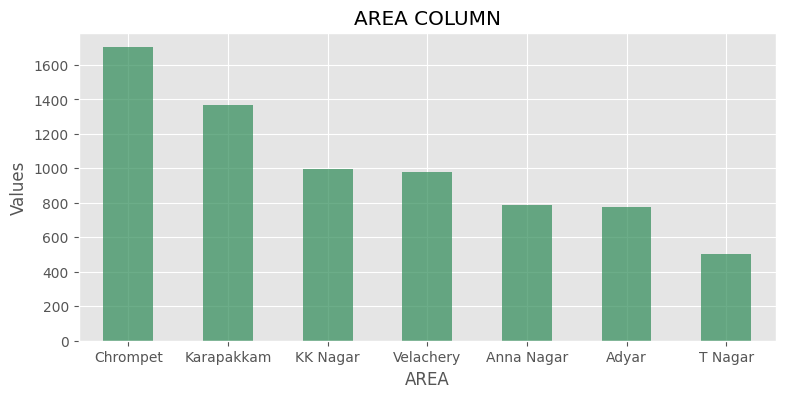

In [ ]:
plt.figure(figsize=(9,4))
plt.xlabel('AREA')
plt.ylabel("Values")
plt.title("AREA COLUMN")
df.AREA.value_counts().plot(kind="bar", color="seagreen", alpha=0.7)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

Maximum number of houses are at Chrompet and minimum number of houses are at T Nagar.

SALE_COND Column

In [ ]:
#counting values in SALE_COND column
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
#Spelling corrections and replacement in SALE_COND column
#Replacing AdjLand with Adj Land.
#Replacing Partiall, PartiaLl with Partial.
#Replacing Ab Normal with AbNormal.

df["SALE_COND"].replace({"Partiall": "Partial", "PartiaLl":"Partial"},inplace =True)
df["SALE_COND"].replace("AdjLand", "Adj Land",inplace =True)
df["SALE_COND"].replace("Ab Normal", "AbNormal",inplace =True)

In [ ]:
#counting values in SALE_COND column after spelling correction and replacement
print(df.SALE_COND.value_counts(),"\n")

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64 



Bar Plot for SALE_COND

<function matplotlib.pyplot.show>

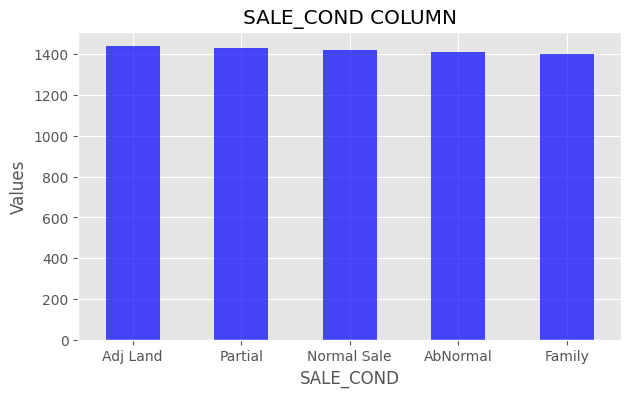

In [ ]:
plt.figure(figsize=(7,4))
plt.xlabel('SALE_COND')
plt.ylabel("Values")
plt.title("SALE_COND COLUMN")
df.SALE_COND.value_counts().plot(kind="bar", color="blue", alpha=0.7)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

Maximum number of houses have sales condition as AdjLand and least number of houses have sales condition as Family.

The number of occurrences of each value in the 'SALE_COND' column do not vary too much.

PARK_FACIL Column

In [ ]:
#counting values in PARK_FACIL column
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
#Spelling corrections and replacement in PARK_FACIL column
#Replacing Noo with No

df["PARK_FACIL"].replace("Noo", "No",inplace =True)

In [ ]:
#counting values in PARK_FACIL column after spelling correction and replacement
print(df.PARK_FACIL.value_counts(),"\n")

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64 



Bar Plot for PARK_FACIL

<function matplotlib.pyplot.show>

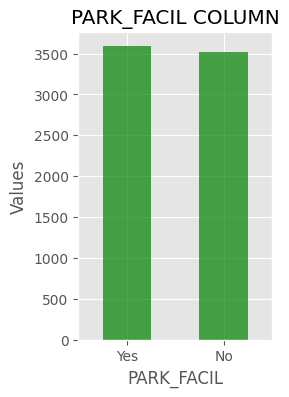

In [ ]:
plt.figure(figsize=(2.5,4))
plt.xlabel('PARK_FACIL')
plt.ylabel("Values")
plt.title("PARK_FACIL COLUMN")
df.PARK_FACIL.value_counts().plot(kind="bar", color="green", alpha=0.7)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

The number of occurrences of each value in the Parking Facility is slightly high if building has parking facility(yes).

BUILDTYPE Column

In [ ]:
#counting values in BUILDTYPE column
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
#Spelling corrections and replacement in BUILDTYPE column
#Replacing Comercial with Commercial
#Replacing Others with Other

df["BUILDTYPE"].replace("Comercial", "Commercial",inplace =True)
df["BUILDTYPE"].replace("Others", "Other",inplace =True)

In [ ]:
#counting values in BUILDTYPE column after spelling correction and replacement
print(df.BUILDTYPE.value_counts(),"\n")

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64 



Bar Plot for BUILDTYPE

<function matplotlib.pyplot.show>

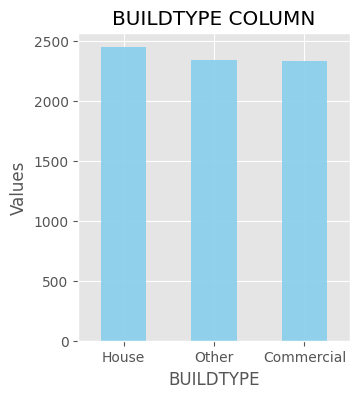

In [ ]:
plt.figure(figsize=(3.5,4))
plt.xlabel('BUILDTYPE')
plt.ylabel("Values")
plt.title("BUILDTYPE COLUMN")
df.BUILDTYPE.value_counts().plot(kind="bar", color="skyblue", alpha=0.9)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

The maximum number of observations are coming under House and minimum number of observations are coming under Commercial.

UTILITY_AVAIL Colums

In [ ]:
#counting values in UTILITY_AVAIL column
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
#Spelling corrections and replacement in UTILITY_AVAIL column
#Replacing AllPub with All Pub

df["UTILITY_AVAIL"].replace("AllPub", "All Pub",inplace =True)

In [ ]:
#counting values in UTILITY_AVAIL column after spelling correction and replacement
print(df.UTILITY_AVAIL.value_counts(),"\n")

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64 



Bar Plot for UTILITY_AVAIL

<function matplotlib.pyplot.show>

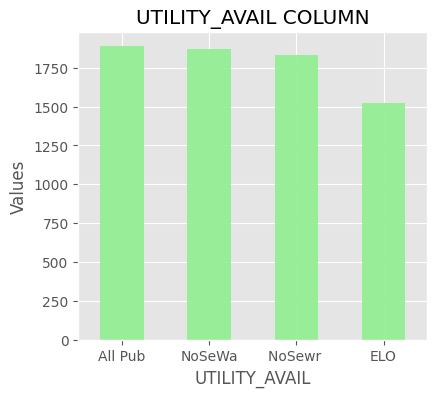

In [ ]:
plt.figure(figsize=(4.5,4))
plt.xlabel('UTILITY_AVAIL')
plt.ylabel("Values")
plt.title("UTILITY_AVAIL COLUMN")
df.UTILITY_AVAIL.value_counts().plot(kind="bar", color="lightgreen", alpha=0.9)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

The maximum number of observations are coming under "AllPub" and minimum number of observations are coming under "ELO".

The number of occurrences/observations under AllPub,NoSeWa and NoSewr are almost the same with only a little difference.



STREET Column

In [ ]:
#counting values in STREET column
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
#Spelling corrections and replacement in STREET column
#Replacing Pavd with Paved
#Replacing NoAccess with No Access

df["STREET"].replace("Pavd", "Paved",inplace =True)
df["STREET"].replace("NoAccess", "No Access",inplace =True)

In [ ]:
#counting values in STREET column after spelling correction and replacement
print(df.STREET.value_counts(),"\n")

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64 



Bar Plot for STREET

<function matplotlib.pyplot.show>

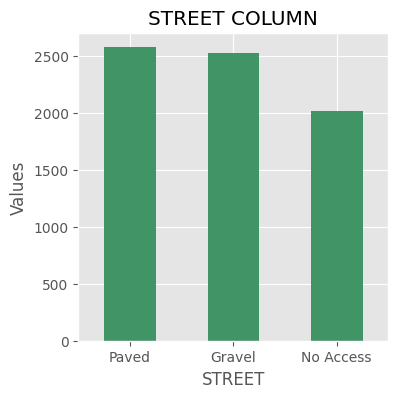

In [ ]:
plt.figure(figsize=(4,4))
plt.xlabel('STREET')
plt.ylabel("Values")
plt.title("STREET COLUMN")
df.STREET.value_counts().plot(kind="bar", color="seagreen", alpha=0.9)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

The maximum number of observations are coming under "Paved" and minimum number of observations are coming under "No Access".

The number of occurrences/observations under Paved and Gravel are almost the same with only a little difference.



MZZONE Column

In [ ]:
#counting values in MZZONE column
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Bar Plot for MZZONE

<function matplotlib.pyplot.show>

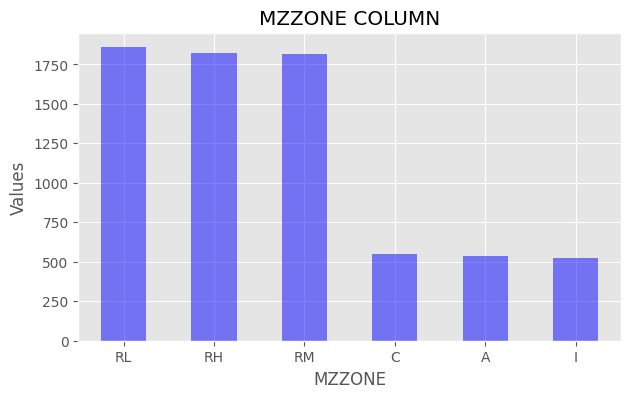

In [ ]:
plt.figure(figsize=(7,4))
plt.xlabel('MZZONE')
plt.ylabel("Values")
plt.title("MZZONE COLUMN")
df.MZZONE.value_counts().plot(kind="bar", color="blue", alpha=0.5)
plt.xticks(rotation=0)
plt.show

Inference From the above graph:

The maximum number of observations are coming under "RL" and minimum number of observations are coming under "I".

The number of occurrences/observations under RL,RH and RM are almost the same (around 1800) with only a little difference between them. Similarly,number of occurrences/observations under C,A and I are almost the same (around 500) with only a little difference between them.

In [ ]:
#EXtracting categorical columns after spelling corrections
df_newcat= df.select_dtypes(include=["object"])
print(f"Number of Categorical columns : {df_newcat.shape[1]}\n")
df_newcat.head()

Number of Categorical columns : 7



AREA SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE
0  Karapakkam  AbNormal        Yes  Commercial       All Pub   Paved      A
1  Anna Nagar  AbNormal         No  Commercial       All Pub  Gravel     RH
2       Adyar  AbNormal        Yes  Commercial           ELO  Gravel     RL
3   Velachery    Family         No       Other       NoSewr    Paved      I
4  Karapakkam  AbNormal        Yes       Other       All Pub  Gravel      C

Categorical columns v/s Price column(Bar plots)

In [ ]:
# Grouping w.r.t 'AREA' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_area=df.groupby(["AREA"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_area

AREA   SALES_PRICE
4  Karapakkam  7.340100e+06
0       Adyar  9.185668e+06
2    Chrompet  1.001381e+07
6   Velachery  1.104735e+07
3    KK Nagar  1.269623e+07
1  Anna Nagar  1.516820e+07
5     T Nagar  1.561674e+07

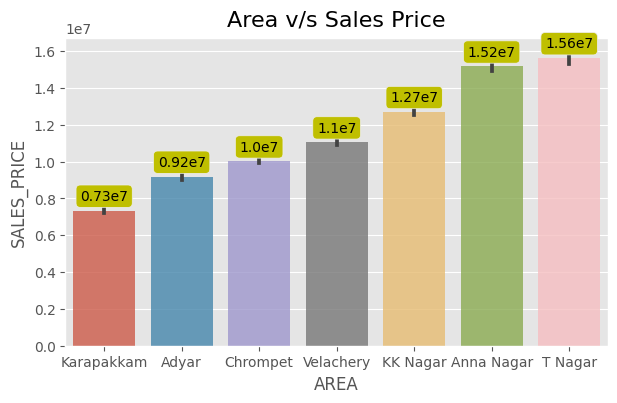

In [ ]:
# Barplot between Area and Sales Price.
plt.figure(figsize=(7,4))
plt.title("Area v/s Sales Price", fontsize=16, va='bottom')
# By default mean values will be plotted when sns.barplot() is used.
br1=sns.barplot(x = "AREA", y = "SALES_PRICE", data=df,
                order=result_area["AREA"], alpha=0.8)
for p in br1.patches:
  br1.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.4*10**6),
              ha='center', va='bottom', bbox=dict(boxstyle="round", fc="y"))
plt.xticks(rotation=0)
plt.show()


Inference From the above graph:

The average sales price of observations(houses) in T Nagar is the highest and the average sales price of observations(houses) in Karapakkam is the lowest.
There is almost a steady linear increase in Sales Price observed w.r.t the values in 'AREA' Column. This shows that there is a linear relationship between 'AREA'(Feature) and 'SALES_PRICE'(Target) Columns.
Due to the above reason, we will do label encoding for 'AREA' column.

In [ ]:
# Grouping w.r.t 'SALE_COND' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_sale_cond=df.groupby(["SALE_COND"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_sale_cond


SALE_COND   SALES_PRICE
4      Partial  1.061637e+07
2       Family  1.073642e+07
0     AbNormal  1.091463e+07
3  Normal Sale  1.099418e+07
1     Adj Land  1.120931e+07

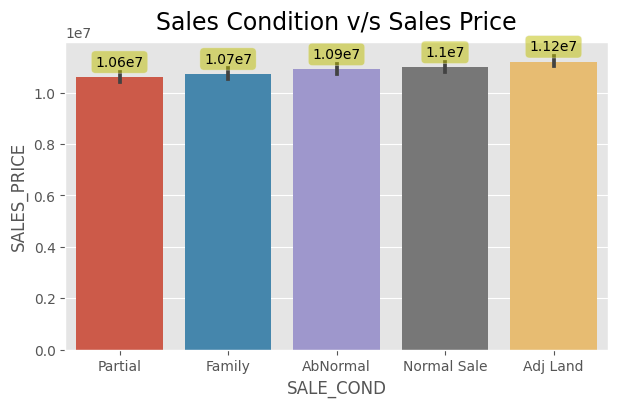

In [ ]:
# Barplot between Sales Condition and Sales Price.
plt.figure(figsize=(7,4))
plt.title("Sales Condition v/s Sales Price",  fontsize=17, va='bottom')
br2=sns.barplot(x = "SALE_COND", y = "SALES_PRICE", data=df, order=result_sale_cond['SALE_COND'])
for p in br2.patches:
  br2.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom', bbox=dict(boxstyle="round", fc="y", alpha=0.5))

plt.show()


Inference From the above graph:

The average sales price of observations(houses) with 'AdjLand' as Sales Condition is the highest and average sales price of observations(houses) with 'Partial' as Sales Condition is the lowest.
There is almost a small but steady linear increase in the average sales price observed w.r.t the values in 'SALE_COND' Column. This shows that there is a slight linear relationship between 'SALE_COND'(Feature) and 'SALES_PRICE'(Target) Columns.
Due to the above reason, we will do label encoding for 'SALE_COND' column.

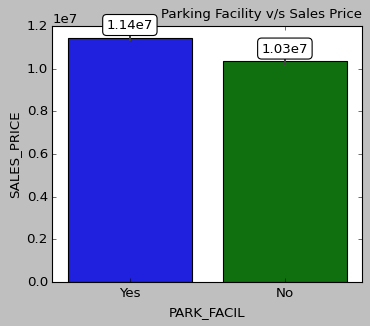

In [ ]:
# Barplot between Parking Facility and Sales Price(SP).
plt.style.use('classic')
plt.figure(figsize=(5,4))
plt.title("Parking Facility v/s Sales Price",  fontsize=12, loc="right", va='bottom')
br3=sns.barplot(x = "PARK_FACIL", y = "SALES_PRICE", data=df)
for p in br3.patches:
  br3.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom', bbox=dict(boxstyle="round", fc="w"))

plt.show()

Inference From the above graph:

The average sales price of observations(houses) with parking facility is more compared to observations(houses) with NO parking facility.
As they are binary Categorical values, we will do label-encoding.

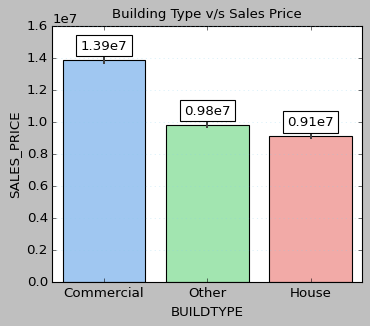

In [ ]:
# Barplot between Building Type and Sales Price(SP).
plt.style.use('seaborn-pastel')
plt.figure(figsize=(5,4))
plt.title("Building Type v/s Sales Price",  fontsize=12, va='bottom')
br4=sns.barplot(x = "BUILDTYPE", y = "SALES_PRICE", data=df)
for p in br4.patches:
  br4.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.5*10**6),
              ha='center', va='bottom', bbox=dict(fc="w"))
plt.grid(True,axis="y", color="skyblue",alpha=0.5)
plt.show()


Inference From the above graph:

The average sales price of observations(houses) with 'Commercial' as Building Type is the highest and average sales price of observations(houses) with 'House' as Building Type is the least.
The plot does not indicate any linear relationship between the sales price and Building type.
Opting for one-hot encoding for 'BUILDTYPE' Column.


In [ ]:
# Grouping w.r.t 'UTILITY_AVAIL' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_utility_avail=df.groupby(["UTILITY_AVAIL"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_utility_avail

UTILITY_AVAIL   SALES_PRICE
1           ELO  1.046941e+07
2        NoSeWa  1.089308e+07
3       NoSewr   1.092576e+07
0       All Pub  1.121002e+07

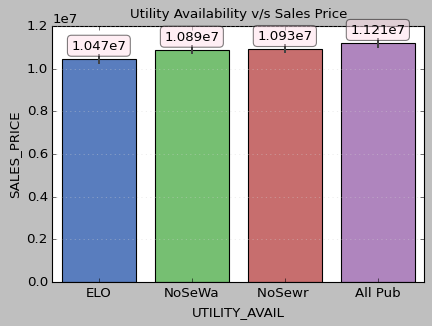

In [ ]:
# Barplot between Utility Availability and Sales Price(SP).
plt.style.use('seaborn-muted')
plt.figure(figsize=(6,4))
plt.title("Utility Availability v/s Sales Price",  fontsize=12, va='bottom')
br5=sns.barplot(x = "UTILITY_AVAIL", y = "SALES_PRICE", data=df, order=result_utility_avail["UTILITY_AVAIL"])
for p in br5.patches:
  br5.annotate(str(round(p.get_height()/10**7,3))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom', 
              bbox=dict(boxstyle="round", fc="#ffdeea", alpha=0.5))
plt.grid(True,axis="y", color="lightgrey",alpha=0.7)
plt.show()


Inference From the above graph:

The average sales price of observations(houses) with 'AllPub' is the highest and average sales price of observations(houses) with 'ELO' is the lowest.
There is linear relationship between 'UTILITY_AVAIL'(Feature) and 'SALES_PRICE'(Target) Columns.
Opting for label encoding for 'UTILITY_AVAIL' column.


In [ ]:
# Grouping w.r.t 'STREET' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_street=df.groupby(["STREET"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_street


STREET   SALES_PRICE
1  No Access  1.000074e+07
2      Paved  1.105754e+07
0     Gravel  1.144462e+07

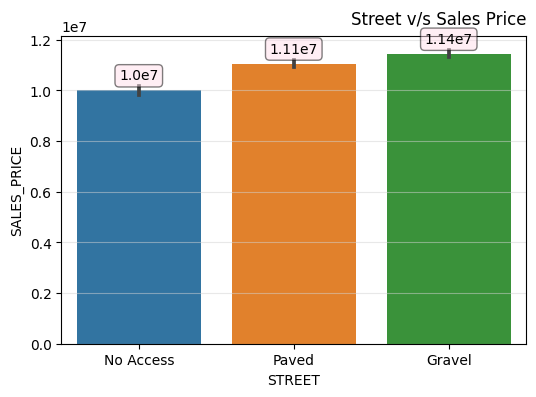

In [ ]:
# Barplot between Street and Sales Price(SP).
plt.style.use('default')
plt.figure(figsize=(6,4))
plt.title("Street v/s Sales Price",  fontsize=12, loc="right", va='bottom')
br6=sns.barplot(x = "STREET", y = "SALES_PRICE", data=df, order=result_street["STREET"])
for p in br6.patches:
  br6.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="#ffdeea",alpha = 0.5))
plt.grid(True,axis="y", color="lightgrey",alpha=0.5)
plt.show()


Inference From the above graph:

The average sales price of observations(houses) under 'Gravel' is the highest and average sales price of observations(houses) under 'No Access' is the lowest.
There is linear relationship between 'STREET'(Feature) and 'SALES_PRICE'(Target) Columns.
Opting for label encoding for 'STREET' column.


In [ ]:
# Grouping w.r.t 'MZZONE' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_zone=df.groupby(["MZZONE"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_zone


MZZONE   SALES_PRICE
0      A  7.292591e+06
1      C  8.052270e+06
2      I  8.738633e+06
3     RH  1.103997e+07
4     RL  1.176576e+07
5     RM  1.240707e+07

Here,

A --> Agriculture
C --> Commercial
I --> Industrial
RH --> Residential High density
RL --> Residential Low density
RM --> Residential Medium density


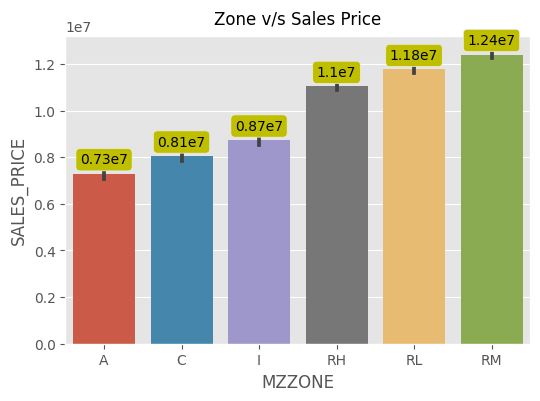

In [ ]:
# Barplot between Zones and Sales Price(SP).
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
plt.title("Zone v/s Sales Price",  fontsize=12, va='bottom')
br7=sns.barplot(x = 'MZZONE', y = "SALES_PRICE", data=df, order=result_zone['MZZONE'])
for p in br7.patches:
  br7.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y"))
plt.show()


Inference From the above graph:

The average sales price of observations(houses) under 'Residential Medium density-RM' is the highest and average sales price of observations(houses) under 'Agriculture-A' is the lowest in 'MZZONE' Column.
There is almost a steady linear increase in the average sales price observed w.r.t the values in 'MZZONE' Column in the 1st and 2nd section of the graph. Although the sales price of houses under 'A','C','I' zones and the sales price of houses under 'RH','RL','RM' zones are steadily increasing, there is a jump in the average sales price of houses under 'I' to 'RH' zone.
This shows that there might be some relationship between the 'MZZONE' & 'SALES_PRICE' Columns, but it is not purely a linear relationship.
Due to the above reason, we will do one-hot encoding for 'MZZONE' column.

Pie charts for categorical columns

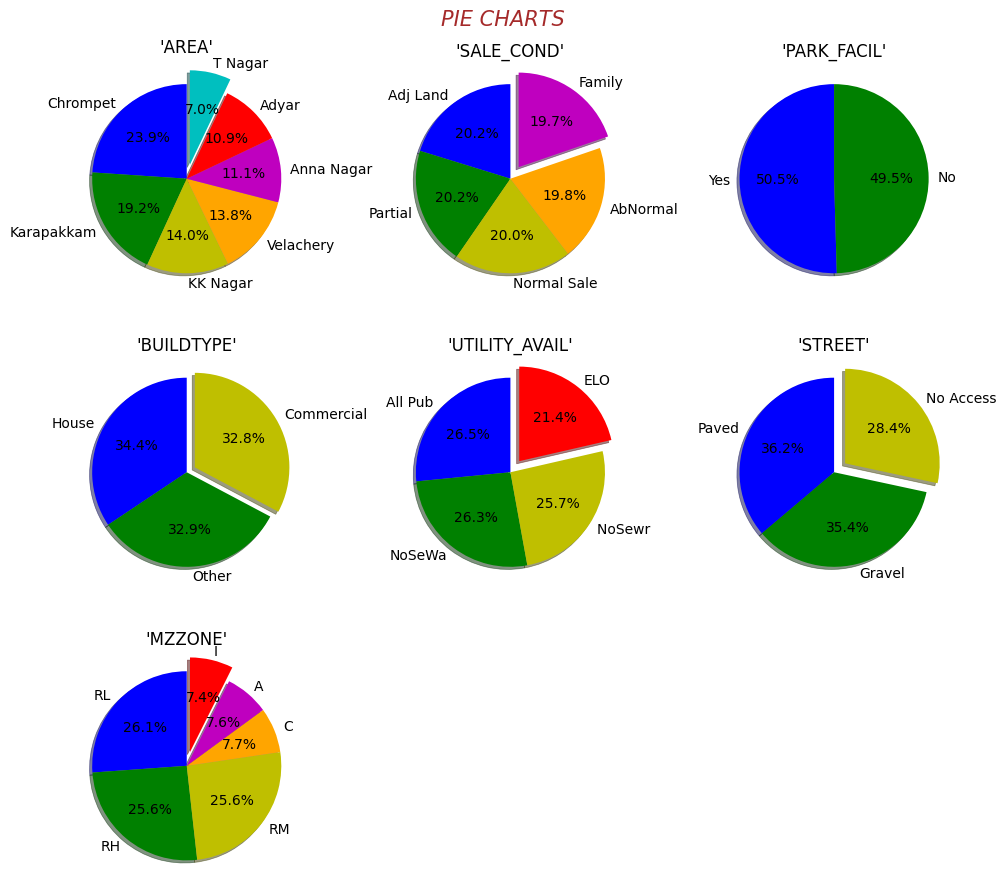

In [ ]:
# Pie Charts w.r.t categorical columns.
fig = plt.figure(figsize=(10,9))
fig.suptitle("PIE CHARTS", fontsize=15,color='brown', 
             style='italic',ha='center', va='bottom')

# Subplot for 'AREA' column.
plt.subplot(331)
plt.title("'AREA'", fontsize=12)
data_area=df["AREA"].value_counts()
ex=[0,0,0,0,0,0,0.15]
clr=["b","g","y","orange","m","r","c"]
label=data_area.index
plt.pie(data_area, startangle = 90, 
        autopct="%1.1f%%",colors=clr,
        explode=ex, shadow = True, labels=label)

# Subplot for 'SALE_COND' column.
plt.subplot(332)
plt.title("'SALE_COND'", fontsize=12, va='top')
data_sc=df["SALE_COND"].value_counts()
ex=[0,0,0,0,0.15]
clr=["b","g","y","orange","m"]
label=data_sc.index
plt.pie(data_sc, startangle = 90, 
        autopct="%1.1f%%",colors=clr,
        explode=ex, shadow = True, labels=label)

# Subplot for 'PARK_FACIL' column.
plt.subplot(333)
plt.title("'PARK_FACIL'", fontsize=12, va='top')
data_pf=df["PARK_FACIL"].value_counts()
clr=["b","g"]
label=data_pf.index
plt.pie(data_pf, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True, labels=label)

# Subplot for 'PARK_FACIL' column.
plt.subplot(334)
plt.title("'BUILDTYPE'", fontsize=12, va='top')
data_bt=df["BUILDTYPE"].value_counts()
clr=["b","g","y"]
label=data_bt.index
plt.pie(data_bt, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True, explode=[0,0,0.1], labels=label)

# Subplot for 'UTILITY_AVAIL' column.
plt.subplot(335)
plt.title("'UTILITY_AVAIL'", fontsize=12, va='top')
data_ua=df['UTILITY_AVAIL'].value_counts()
clr=["b","g","y","r"]
label=data_ua.index
plt.pie(data_ua, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True,explode=[0,0,0,0.15], labels=label)

# Subplot for 'STREET' column.
plt.subplot(336)
plt.title("'STREET'", fontsize=12, va='top')
data_street=df['STREET'].value_counts()
clr=["b","g","y"]
label=data_street.index
plt.pie(data_street, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True,explode=[0,0,0.15], labels=label)


# Subplot for 'MZZONE' column.
plt.subplot(337)
plt.title("'MZZONE'", fontsize=12, va='top')
data_mzone=df['MZZONE'].value_counts()
clr=["b","g","y","orange","m","r"]
label=data_mzone.index
ex=[0,0,0,0,0,0.15]
plt.pie(data_mzone, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True,explode=ex, labels=label)

plt.tight_layout()
plt.show()


Inference From the above graph:

The Distribution of values in different Categorical columns is shown above. The blue color indicates the value with highest percentage of contribution in that categorical column.
There is almost an equal distribution of different values in 'SALE_COND', 'PARK_FACIL' and 'BUILDTYPE' columns.

Distribution plot for columns with continuous values

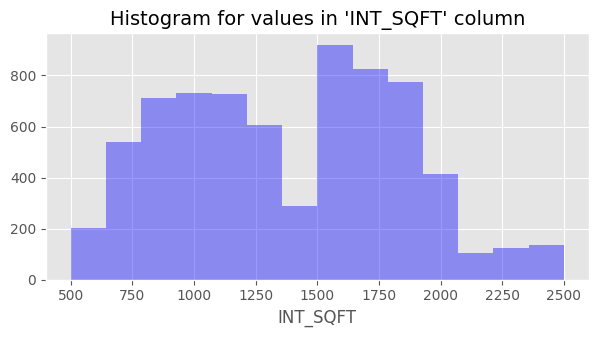

In [ ]:
# Histogram showing distribution of values in 'INT_SQFT' column.
plt.figure(figsize=(7,3.2))
plt.title("Histogram for values in 'INT_SQFT' column",  fontsize=14)
sns.distplot(df['INT_SQFT'], hist=True, kde=False, bins="sturges", color="b")
plt.show()


Inference From the above graph:

The values in 'INT_SQFT' column are NOT Normally distributed.
Maximum number of observations are seen to occur after 1500 units in 'INT_SQFT' column.
There is a decrease in the number of buildings with more than 2000 units in 'INT_SQFT' column.
There are lesser number of observations for buildings with 'INT_SQFT' ranging from approx 1375 to 1500 units.

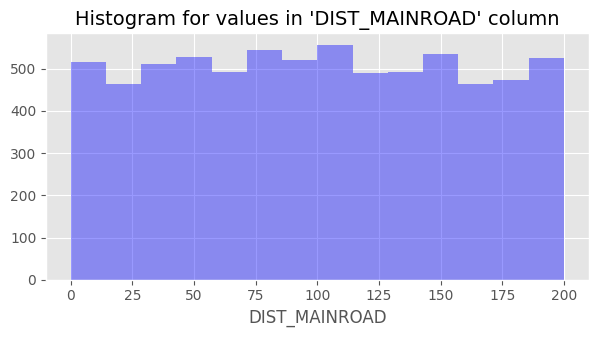

In [ ]:
# Histogram showing distribution of values in 'DIST_MAINROAD' column.
plt.figure(figsize=(7,3.2))
plt.title("Histogram for values in 'DIST_MAINROAD' column",  fontsize=14)
sns.distplot(df['DIST_MAINROAD'], hist=True, kde=False, bins="sturges", color="b")
plt.show()


Inference From the above graph:

The values in 'DIST_MAINROAD' column are NOT Normally distributed, in fact, they are almost uniformly distributed.

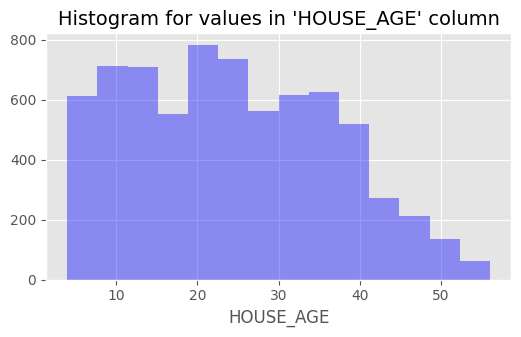

In [ ]:
# Histogram showing distribution of values in 'HOUSE_AGE' column.
plt.figure(figsize=(6,3.2))
plt.title("Histogram for values in 'HOUSE_AGE' column",  fontsize=14)
sns.distplot(df['HOUSE_AGE'], hist=True, kde=False, bins="sturges", color="b")
plt.show()


Inference From the above graph:

The values in 'BUILD_AGE' column are NOT Normally distributed.
Maximum number of observations are seen to occur at around 20 years.
Approximately after 38 years of Building the house, there seems to be a decrease in the number of observations. That is, the number of building with more than 38 years of life span is less (decreasing with increase in life span of Building).

Numerical columns v/s Sales price(Scatter & Bar Plots)

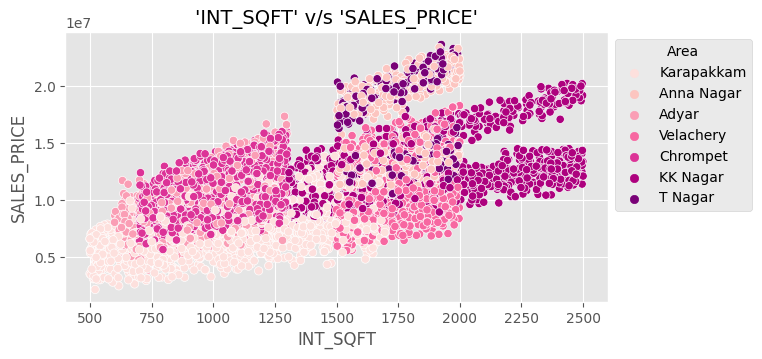

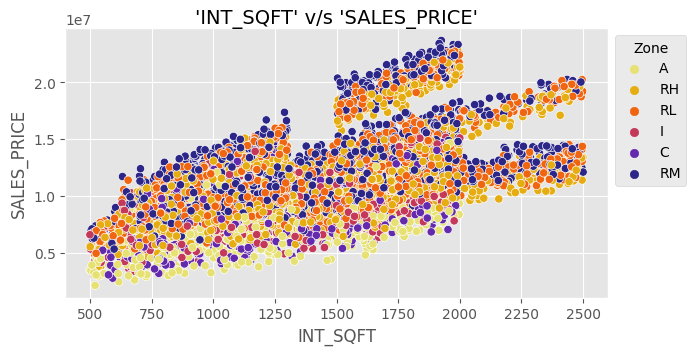

In [ ]:
# Scatterplot between 'INT_SQFT' and 'SALES_PRICE' columns with hue as "AREA" column.
plt.figure(figsize=(7,3.5))
plt.title("'INT_SQFT' v/s 'SALES_PRICE'",  fontsize=14)
sns.scatterplot(x = 'INT_SQFT', y = "SALES_PRICE", hue = "AREA", 
                data=df, palette="RdPu")
plt.legend(title="Area", bbox_to_anchor = (1,1))
plt.show()

# Scatterplot between 'INT_SQFT' and 'SALES_PRICE' columns with hue as "MZZONE" column.
plt.figure(figsize=(7,3.5))
plt.title("'INT_SQFT' v/s 'SALES_PRICE'",  fontsize=14, va="top")
sns.scatterplot(x = 'INT_SQFT', y = "SALES_PRICE", hue = "MZZONE", 
                data=df, palette="CMRmap_r")
plt.legend(title="Zone", bbox_to_anchor = (1,1))
plt.show()


Inference From the above graph:

KK Nagar has the biggest houses.

The size of the house in T Nagar and Anna Nagar is between 1500 to 2000 sq.ft, but its sales price is the highest when compared to others. This maybe because those areas mainly come under Residential Medium density(RM) zone. Other than zone RM, Residential High and Low density(RH,RL) zones are also coming.

We can see that Agriculture Zone has buildings ranging from 500 to 2000 sqft, but their sales prices are relatively lesser when compared to other zones.

There is a clearly a Positive linear relationship between 'INT_SQFT' and 'SALES_PRICE' columns. As the 'INT_SQFT' values increase, the sales price also seems to be increasing.

Due to the above reason, this feature seems to be an important feature for our model.

In [ ]:
# Correlation Coefficient between 'INT_SQFT' and 'SALES_PRICE' columns.
np.corrcoef(df['INT_SQFT'],df['SALES_PRICE'])[0,1]

0.6121248760738686

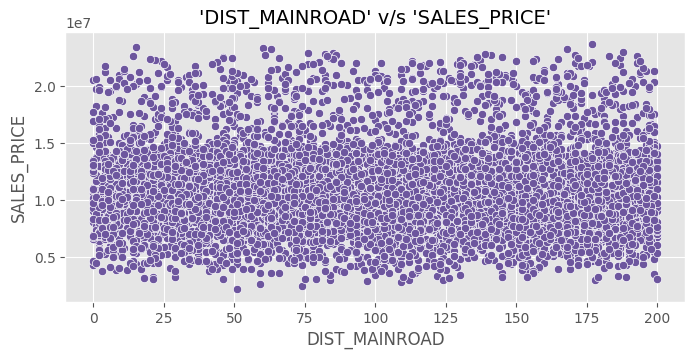

In [ ]:
# Scatterplot between 'DIST_MAINROAD' and 'SALES_PRICE' columns.
plt.figure(figsize=(8,3.5))
plt.title("'DIST_MAINROAD' v/s 'SALES_PRICE'",  fontsize=14)
sns.scatterplot(x = 'DIST_MAINROAD', y = "SALES_PRICE", data=df, color='#6d569e')
plt.show()

Inference From the above graph:

There is a clearly NO linear relationship between 'DIST_MAINROAD' and 'SALES_PRICE' columns.
Since 'N_BEDROOM' is having discrete values we will make Barplot as well.

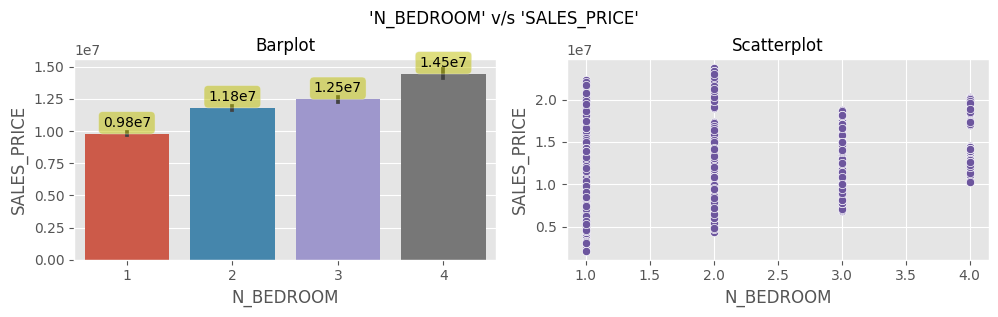

In [ ]:
# Barplot and Scatterplot between 'N_BEDROOM' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(10,3))
fig.suptitle("'N_BEDROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')
# subplot 1: Barplot
plt.subplot(121)
plt.title("Barplot", fontsize=12)
br8=sns.barplot(x = 'N_BEDROOM', y = "SALES_PRICE", data=df)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y",alpha=0.5))

# subplot 2: Scatterplot
plt.subplot(122)
plt.title("Scatterplot", fontsize=12)
sns.scatterplot(x = 'N_BEDROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()


Inference From the above graph:

There seems to be almost a steady linear increase in the average sales price of the building with increase in the number of Bedrooms.
Due to the above reason, this feature seems to be an important feature.
More observations can be seen for Buildings with 1 Bedroom and the range of sales price is also more for it.
Maximum average sales price occur for buildings with 4 Bedrooms and minimum for buildings with 1 Bedroom.
Since 'N_BATHROOM' is also having discrete values we will make Barplot as well.

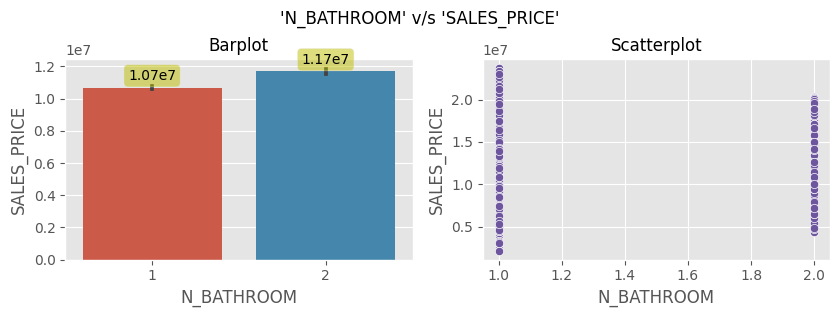

In [ ]:
# Barplot and Scatterplot between 'N_BATHROOM' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(8.5,3))
fig.suptitle("'N_BATHROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(121)
plt.title("Barplot", fontsize=12)
br8=sns.barplot(x = 'N_BATHROOM', y = "SALES_PRICE", data=df)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y",alpha=0.5))

# subplot 2: Scatterplot
plt.subplot(122)
plt.title("Scatterplot", fontsize=12)
sns.scatterplot(x = 'N_BATHROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()


Inference From the above graph:

There seems to be almost a steady linear increase in the average sales price of the building with increase in the number of Bathrooms.
Due to the above reason, this feature seems to be an important feature.
More observations can be seen for Buildings with 1 Bathroom and the range of sales price is also more for it.
Since 'N_ROOM' is also a discrete feature we will create Barplot for better analysis.

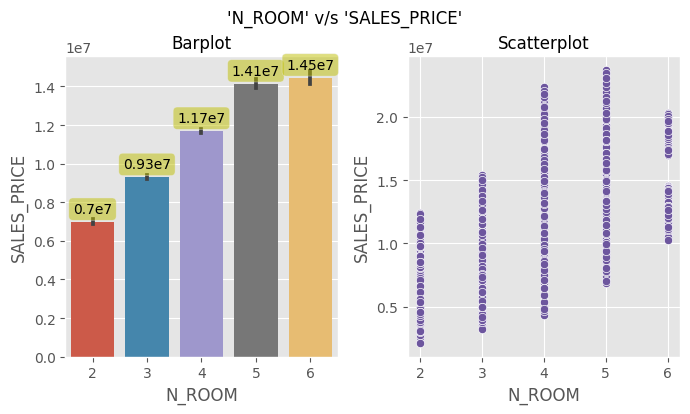

In [ ]:
# Barplot and Scatterplot between 'N_ROOM' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(7,4))
fig.suptitle("'N_ROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(121)
plt.title("Barplot", fontsize=12)
br8=sns.barplot(x = 'N_ROOM', y = "SALES_PRICE", data=df)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y",alpha=0.5))

# subplot 2: Scatterplot
plt.subplot(122)
plt.title("Scatterplot", fontsize=12)
sns.scatterplot(x = 'N_ROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()


Inference From the above graph:

There seems to be increase in the average sales price of buildings with increase in the number of rooms. But, the difference between the average sales price of buildings with 5 and 6 rooms seem to be small. As there is no steady increase in the average sales price of the buildings, we cannot say that 'N_ROOM' and 'SALES_PRICE' are having a linear relationship.

The range of sales price is maximum for Buildings with 4 Rooms.

Maximum average sales price occur for 6 rooms and minimum average sales price occur for 2 rooms.

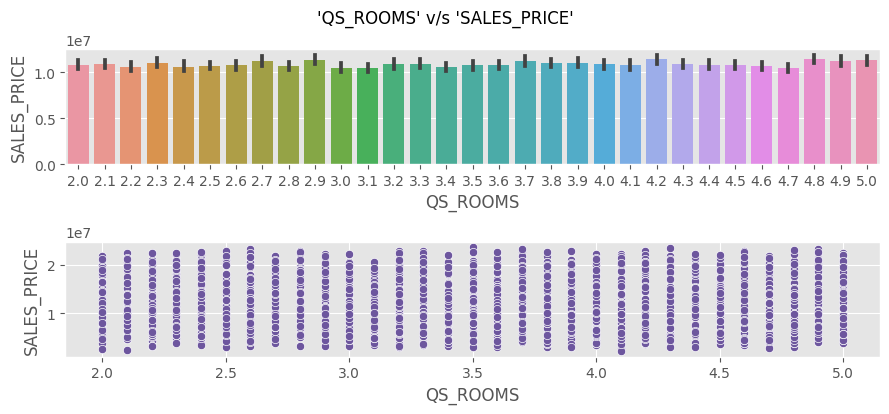

In [ ]:
# Barplot and Scatterplot between 'QS_ROOMS' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,4))
fig.suptitle("'QS_ROOMS' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(211)
sns.barplot(x = 'QS_ROOMS', y = "SALES_PRICE", data=df)

# subplot 2: Scatterplot
plt.subplot(212)
sns.scatterplot(x = 'QS_ROOMS', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()


Inference From the above graph:

No specific pattern can be deduced from the above barplot.
The average selling price is almost the same for all values in 'QS_ROOMS' column. We can deduce from the graph that there is no linear relationship between 'QS_ROOMS' and 'SALES_PRICE' columns.
The average selling price is in and around 10 Million units for all values in 'QS_ROOMS' column.

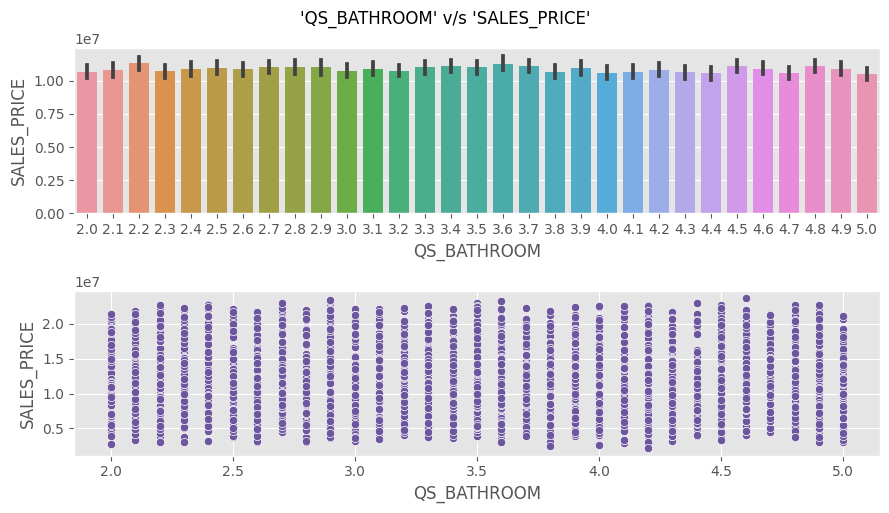

In [ ]:
# Barplot and Scatterplot between 'QS_BATHROOM'  and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,5))
fig.suptitle("'QS_BATHROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(211)
sns.barplot(x = 'QS_BATHROOM', y = "SALES_PRICE", data=df)

# subplot 2: Scatterplot
plt.subplot(212)
sns.scatterplot(x = 'QS_BATHROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

Inference From the above graph:

No specific pattern can be deduced from the above barplot.
The average selling price is almost the same for all values in 'QS_BATHROOM column. We can deduce from the graph that there is no linear relationship between 'QS_BATHROOM' and 'SALES_PRICE' columns.
The average selling price is just above 10 Million units for all values in 'QS_BATHROOM' column.

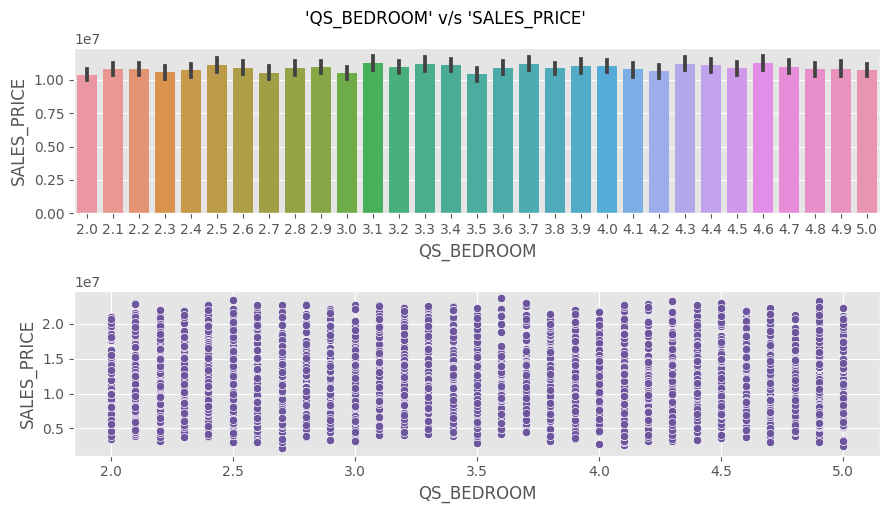

In [ ]:
# Barplot and Scatterplot between 'QS_BEDROOM'  and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,5))
fig.suptitle("'QS_BEDROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(211)
sns.barplot(x = 'QS_BEDROOM', y = "SALES_PRICE", data=df)

# subplot 2: Scatterplot
plt.subplot(212)
sns.scatterplot(x = 'QS_BEDROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

Inference From the above graph:

No specific pattern can be deduced from the above barplot.
The average selling price is almost the same for all values in 'QS_BEDROOM' column. We can deduce from the graph that there is no linear relationship between 'QS_BEDROOM' and 'SALES_PRICE' columns.
The average selling price is in and around 10.125 Million units for all values in 'QS_BEDROOM' column.

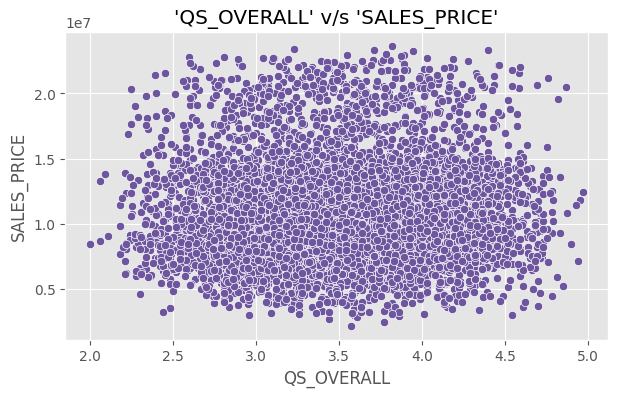

In [ ]:
# Scatterplot between 'QS_OVERALL' and 'SALES_PRICE' columns.
plt.figure(figsize=(7,4))
plt.title("'QS_OVERALL' v/s 'SALES_PRICE'")
sns.scatterplot(x = 'QS_OVERALL', y = "SALES_PRICE", data=df, color='#6d569e')
plt.show()

Inference From the above graph:

There is a clearly NO linear relationship between 'QS_OVERALL' and 'SALES_PRICE' columns.
Due to the above reason, this feature does not seem to be an important for the price prediction.

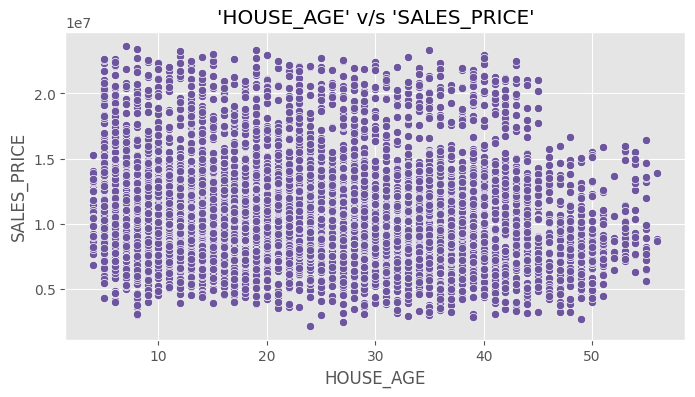

In [ ]:
#Scatterplot between 'HOUSE_AGE'  and 'SALES_PRICE' columns.
plt.figure(figsize=(8,4))
plt.title("'HOUSE_AGE' v/s 'SALES_PRICE'")
sns.scatterplot(x = 'HOUSE_AGE', y = "SALES_PRICE", data=df, color='#6d569e')
plt.show()


Inference From the above graph:

There is a clearly NO linear relationship between 'BUILD_AGE' and 'SALES_PRICE' columns.
Due to the above reason, this feature does not seem to be an important for the price prediction(For a linear model).

In [ ]:
#Grouping w.r.t 'HOUSE_AGE' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_build_age=df.groupby(['HOUSE_AGE'])["SALES_PRICE"].mean().reset_index().sort_values('HOUSE_AGE')
result_build_age.head()


HOUSE_AGE   SALES_PRICE
0          4  1.065067e+07
1          5  1.140857e+07
2          6  1.166451e+07
3          7  1.125365e+07
4          8  1.114652e+07

In [ ]:
# while loop to iterete through first 5 intervals to obtain the mean of sales price of the buildings.

# Age of the Building goes from a minimum of 4 years to a maximum of 56 years.
# This is divided into 6 intervals with 9 years gap in between(Except for the last interval whose gap is not equal to 9 years)
sales=[]
i=4
while i!=49:
  sales.append(sum(result_build_age.loc[(result_build_age['HOUSE_AGE']>=i)&(result_build_age['HOUSE_AGE']<i+9),"SALES_PRICE"]))
  i+=9
sales.append(sum(result_build_age.loc[(result_build_age['HOUSE_AGE']>=49)&(result_build_age['HOUSE_AGE']<57),"SALES_PRICE"]))
sales

[101674486.82714307,
 100796920.35181326,
 98739412.9470256,
 94172099.85917091,
 90953550.97718437,
 75652629.53058997]

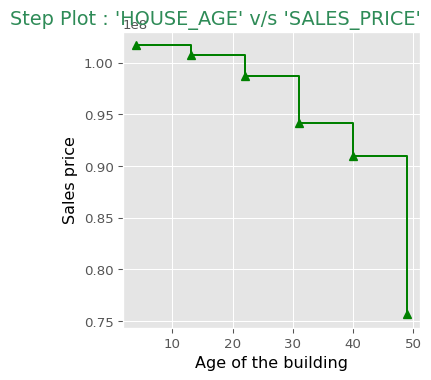

In [ ]:
# The mean of sales price in each interval is plotted.
x_points = [4,13,22,31,40,49]
plt.figure(figsize = (4,4), dpi=96)
plt.title("Step Plot : 'HOUSE_AGE' v/s 'SALES_PRICE'",loc="right",color='seagreen')
plt.xlabel("Age of the building", color="k")
plt.ylabel("Sales price", color="k")
plt.step(x_points, sales, 'g-^', where='post')
plt.show()

Inference From the above graph:

We can see that as the age of the building increases, the sales price is decreasing. So,there might be some relationship between them, but it is not a linear relationship.

Pie Charts

Count of values in 'N_BEDROOM' column:
1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64



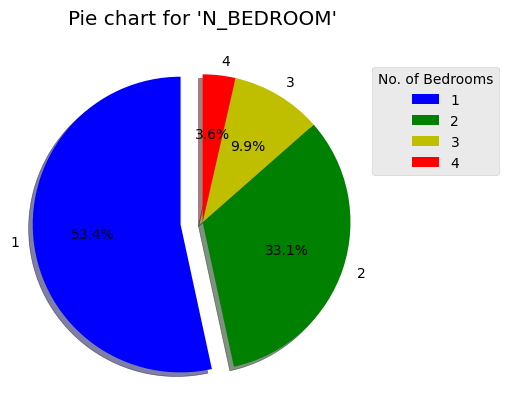

In [ ]:
# Pie chart w.r.t 'N_BEDROOM' column.
data_num_bedroom=df['N_BEDROOM'].value_counts()
print(f"Count of values in 'N_BEDROOM' column:\n{data_num_bedroom}\n")
plt.title("Pie chart for 'N_BEDROOM'",ha='center', va='bottom')
ex=[0.15,0,0,0]
clr=["b","g","y","r"]
label=[1,2,3,4]
plt.pie(data_num_bedroom, startangle = 90, 
        autopct="%1.1f%%", labels=label,
        colors=clr, explode=ex, shadow = True)
plt.legend(title = "No. of Bedrooms", bbox_to_anchor =(0.94,0.94))
plt.show()


Inference From the above graph:

Maximum number of observations/Buildings(more than 50% of total values) are having just 1 Bedroom and the number of buildings with 4 Bedrooms is the minimum(3.6% only).This indicates that buildings with just 1 Bedroom is the most common one.


Count of values in 'N_BATHROOM' column:
1    5594
2    1515
Name: N_BATHROOM, dtype: int64



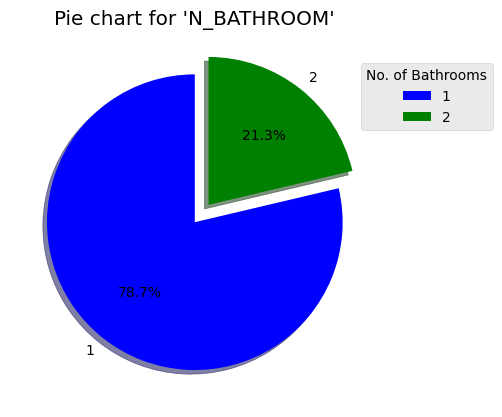

In [ ]:
# Pie chart w.r.t 'N_BATHROOM' column.
data_num_bathroom=df['N_BATHROOM'].value_counts()
print(f"Count of values in 'N_BATHROOM' column:\n{data_num_bathroom}\n")
plt.title("Pie chart for 'N_BATHROOM'",ha='center', va='bottom')
ex=[0,0.15]
clr=["b","g"]
label=[1,2]
plt.pie(data_num_bathroom, startangle = 90, 
        autopct="%1.1f%%", labels=label,
        colors=clr, explode=ex, shadow = True)
plt.legend(title = "No. of Bathrooms",bbox_to_anchor =(0.93,0.95))
plt.show()

Inference From the above graph:

Maximum number of observations/Buildings(almost 80% of total values) are having just 1 Bathroom and the number of buildings with 2 Bedrooms is just about 20% only.This indicates that buildings with just 1 Bathroom is the most common one.

Count of values in 'N_ROOM' column:
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64



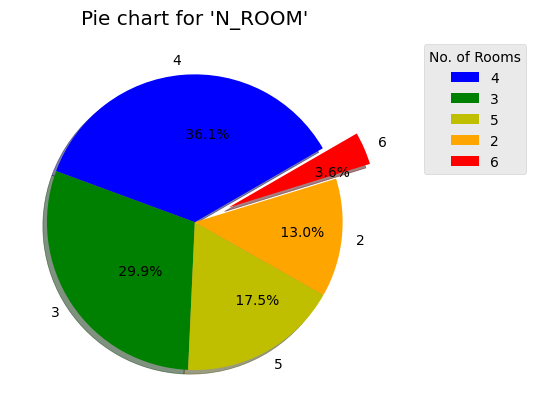

In [ ]:
#Pie chart w.r.t 'N_ROOM' column.
data_num_room=df['N_ROOM'].value_counts()
print(f"Count of values in 'N_ROOM' column:\n{data_num_room}\n")
plt.title("Pie chart for 'N_ROOM'",ha='center', va='bottom')
ex=[0,0,0,0,0.25]
clr=["b","g","y","orange","r"]
label=data_num_room.index
plt.pie(data_num_room, startangle = 30, 
        autopct="%13.1f%%", labels=label,
        colors=clr, explode=ex, shadow = True)
plt.legend(title = "No. of Rooms",bbox_to_anchor =(1.1,1))
plt.show()

Inference From the above graph:

Maximum number of observations/Buildings(almost 36% of total values) are having 4 Rooms and the number of buildings with 6 Rooms is the least one(3.6% only).This indicates that buildings with 4 Rooms is the most common one. Maybe this is because of high number of commercial buildings.

Label Encoding
We will do Label Encoding forAREA, SALE_COND, PARK_FACIL, UTILITY_AVAIL and STREETcolumns.

In [ ]:
# Encoding categorical data in 'AREA' column.
df['AREA'] = df['AREA'].map({"Karapakkam":1, "Adyar":2, "Chrompet":3,
                             "Velachery":4, "KK Nagar":5, "Anna Nagar":6,
                             "T Nagar":7})
df['AREA'].value_counts()


3    1702
1    1366
5     997
4     981
6     788
2     774
7     501
Name: AREA, dtype: int64

In [ ]:
# Encoding categorical data in 'SALE_COND' column.
df['SALE_COND'] = df['SALE_COND'].map({"Partial":1, "Family":2, "AbNormal":3,
                             "Normal Sale":4, "AdjLand":5})
df['SALE_COND'].value_counts()

1.0    1433
4.0    1423
3.0    1411
2.0    1403
Name: SALE_COND, dtype: int64

In [ ]:
# Encoding categorical data in 'PARK_FACIL' column.
df['PARK_FACIL'] = df['PARK_FACIL'].map({"Yes":1, "No":0})
df['PARK_FACIL'].value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [ ]:
# Encoding categorical data in 'UTILITY_AVAIL' column.
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({"ELO":1, "NoSeWa":2, "NoSewr ":3, "AllPub":4}) # no sewr is 'NoSewr '
df['UTILITY_AVAIL'].value_counts()

2.0    1871
3.0    1829
1.0    1522
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
# Encoding categorical data in 'STREET' column.
df['STREET'] = df['STREET'].map({"No Access":1, "Paved":2, "Gravel":3})
df['STREET'].value_counts()


2    2572
3    2520
1    2017
Name: STREET, dtype: int64

One Hot Encoding

In [ ]:
# List of Categorical columns.
col_to_encode=list(df_newcat.columns)
col_to_encode

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [ ]:
#Removing 'AREA', 'SALE_COND', and 'UTILITY_AVAIL' from above list
label_encoded = ['AREA', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL','STREET']
for i in label_encoded:
  col_to_encode.remove(i)
col_to_encode


['BUILDTYPE', 'MZZONE']

In [ ]:
# One Hot Encoding for the Categorical columns in col_to_encode list.
df_new=pd.get_dummies(df, columns=col_to_encode, drop_first=True)
df_new.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     1      1004 2011-04-05            131          1           1       3   
1     6      1986 2006-12-19             26          2           1       5   
2     2       909 2012-04-02             70          1           1       3   
3     4      1855 2010-03-13             14          3           2       5   
4     1      1226 2009-05-10             84          1           1       3   

   SALE_COND  PARK_FACIL DATE_BUILD  ...  QS_OVERALL  HOUSE_AGE  SALES_PRICE  \
0        3.0           1 1967-05-15  ...       4.330         44      7600000   
1        3.0           0 1995-12-22  ...       3.765         11     21717770   
2        3.0           1 1992-09-02  ...       3.090         20     13159200   
3        2.0           0 1988-03-18  ...       4.010         22      9630290   
4        3.0           1 1979-10-13  ...       3.290         30      7406250   

   BUILDTYPE_House  BUILDTYPE_Other  MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  \
0                0                0         0         0          0          0   
1                0                0         0         0          1          0   
2                0                0         0         0          0          1   
3                0                1         0         1          0          0   
4                0                1         1         0          0          0   

   MZZONE_RM  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 25 columns]

In [ ]:
# Names of all the columns present in the new Dataframe.
df_new.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'HOUSE_AGE', 'SALES_PRICE', 'BUILDTYPE_House',
       'BUILDTYPE_Other', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL',
       'MZZONE_RM'],
      dtype='object')

In [ ]:
#Number of rows and columns in the new dataframe.
df_new.shape

(7109, 25)

In [ ]:
# Numerical features in the Dataframe df_new.
df_num= df_new.select_dtypes(include=['int64','float64','uint8'])
features=list(df_num.columns)
features.remove("SALES_PRICE")
features

['AREA',
 'INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'SALE_COND',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'STREET',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'HOUSE_AGE',
 'BUILDTYPE_House',
 'BUILDTYPE_Other',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM']

Heatmap

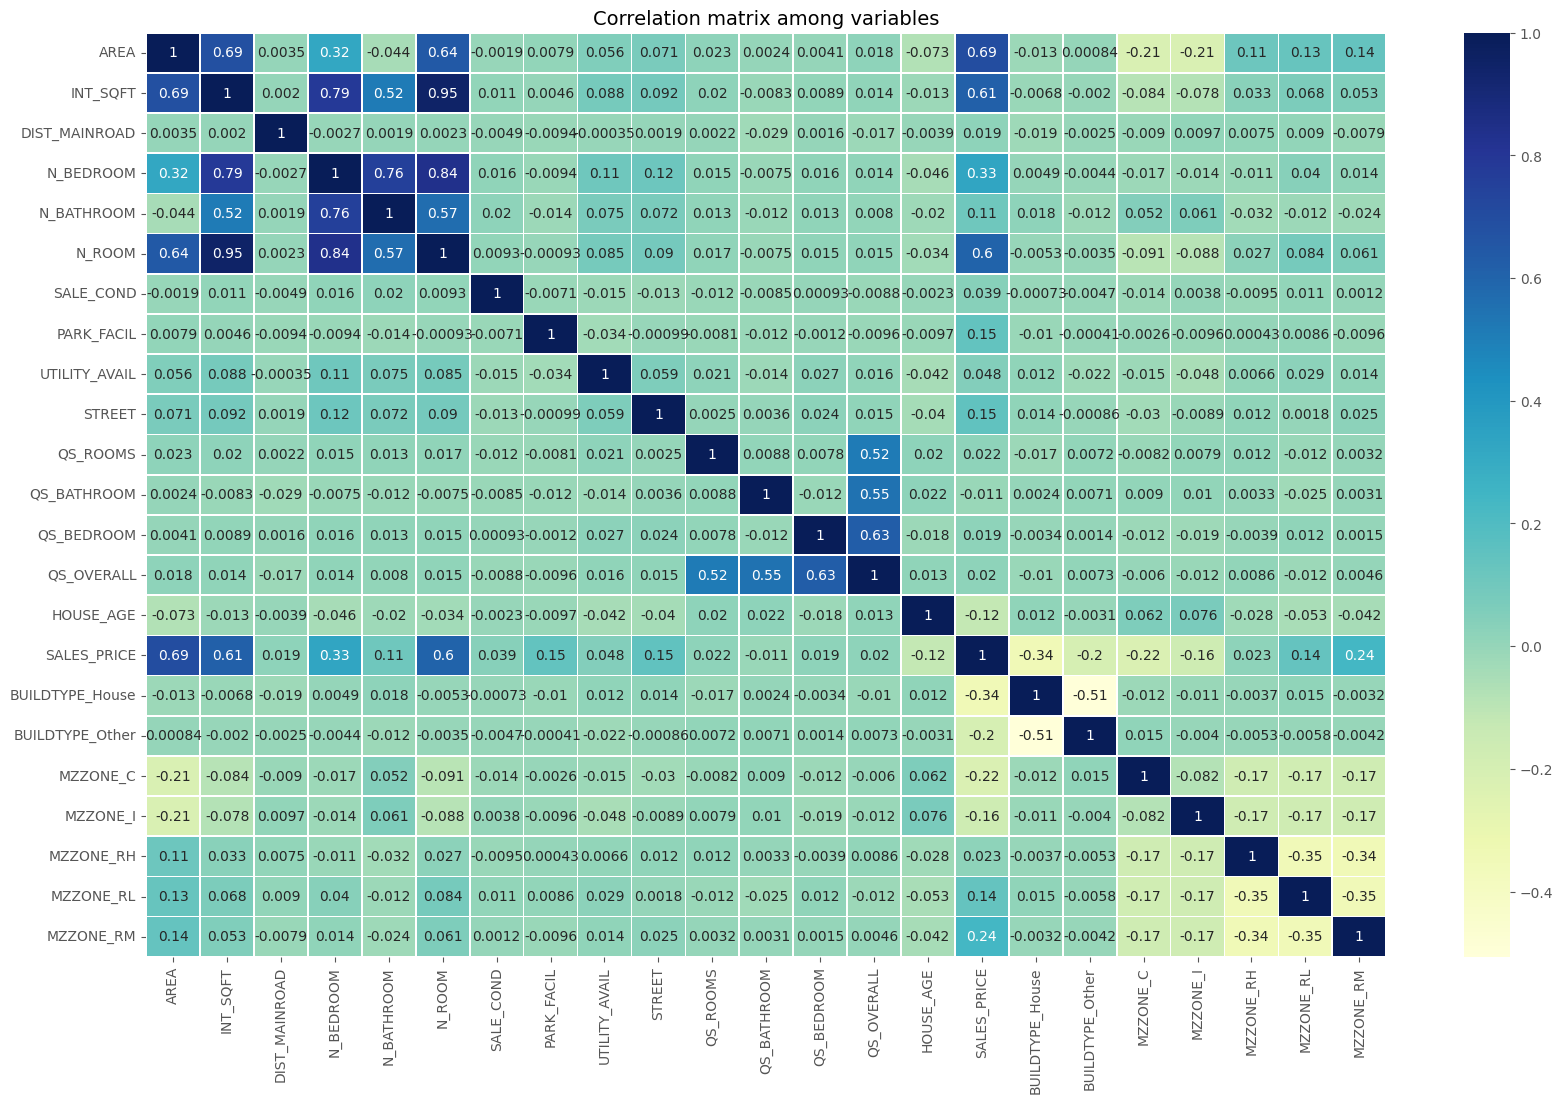

In [ ]:
# Heatmap to observe correlations of numerical columns in df_num.
corr_df = df_num.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_df, annot=True, linewidths=0.5,cmap='YlGnBu')
plt.title("Correlation matrix among variables",fontsize=10)
plt.show()

Inference From the above graph:

Many features are not having good correlation coefficient value with the response variable( i.e., many features posses weak or no linear relationship with the output variable).

Feature Selection(Linear Regression)

In [ ]:
# Python dictionary storing the weak(0.1 and above) to highly correlated features with price and the corresponding correlation values.
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df_new['SALES_PRICE'], df_new[f])[0, 1]
  if (corr_coef >= 0.1) or (corr_coef <= -0.1):
    major_features[f] = corr_coef

print("Number of features weak(0.1 and above) to highly correlated with sales price =",
      len(major_features), "\n")
major_features

Number of features weak(0.1 and above) to highly correlated with sales price = 14 



{'AREA': 0.6941486128515783,
 'BUILDTYPE_House': -0.3449820211861342,
 'BUILDTYPE_Other': -0.20178321646857902,
 'HOUSE_AGE': -0.1197695634712397,
 'INT_SQFT': 0.6121248760738686,
 'MZZONE_C': -0.21844113078513175,
 'MZZONE_I': -0.1615806606319729,
 'MZZONE_RL': 0.13746646203258947,
 'MZZONE_RM': 0.23513397561410063,
 'N_BATHROOM': 0.10883438753787143,
 'N_BEDROOM': 0.3309868165825561,
 'N_ROOM': 0.6027596075987967,
 'PARK_FACIL': 0.14642814513891275,
 'STREET': 0.14958917975083127}

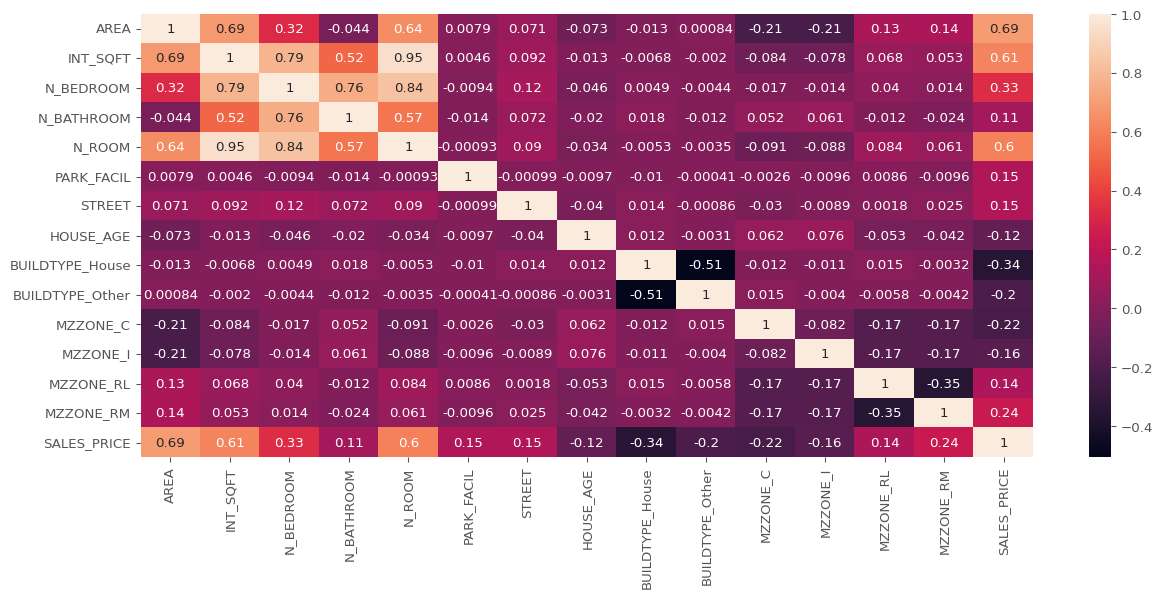

In [ ]:
# Heatmap to visualise the correlation between the above features.
plt.figure(figsize=(15, 6), dpi = 96)
sns.heatmap(df_new[list(major_features.keys())+['SALES_PRICE']].corr(), annot = True)
plt.show()


Inference From the above graph:

'AREA' column has relatively the highest correlation coefficient value with the response variable.


Train-Test Split

In [ ]:
# Split the 'df_new' Dataframe into the training and testing datasets.
train_df, test_df = train_test_split(df_new, test_size = 0.33, random_state = 42)

# Separate data-frames for the feature and target variables
X_train = train_df[major_features.keys()]
y_train = train_df['SALES_PRICE']
X_test = test_df[major_features.keys()]
y_test = test_df['SALES_PRICE']

# Shape of X_train,y_train,X_test,y_test.
print("Shape of feature variables of training dataset",X_train.shape)
print("Shape of target variable of training dataset",y_train.shape)
print("Shape of feature variables of testing dataset",X_test.shape)
print("Shape of target variable of testing dataset",y_test.shape)


Shape of feature variables of training dataset (4763, 14)
Shape of target variable of training dataset (4763,)
Shape of feature variables of testing dataset (2346, 14)
Shape of target variable of testing dataset (2346,)


Feature Scaling or MinMax Scaler
Generally for linear regression models we do Standard Scaling. But here as 'INT_SQFT' does not follow normal distribution(which is clear from the previous histogram), so we will do Normalization/MinMax Scaler.
Also we only need to scale this column only.

In [ ]:
# Initialise the Scaler
scaler = MinMaxScaler()
 
# To scale and transform data
X_train['INT_SQFT']=scaler.fit_transform(X_train['INT_SQFT'].values.reshape(-1,1))
X_test['INT_SQFT']=scaler.transform(X_test['INT_SQFT'].values.reshape(-1,1))

# scaled feature - 'INT_SQFT'
X_train['INT_SQFT'].head()


5424    0.676338
6043    0.522761
4942    0.315658
2185    0.631316
5893    0.934967
Name: INT_SQFT, dtype: float64

Linear Regression(using statsmodels.api and sklearn) and RFE

In [ ]:
#Build a linear regression model using statsmodels.api.
# Add the 'const' column to the features set.
X_train_sm = sm.add_constant(X_train)
sm_lr1 = sm.OLS(y_train, X_train_sm).fit()

# OLS Regression Results
print(sm_lr1.summary())
 

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3459.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        08:20:08   Log-Likelihood:                -73180.
No. Observations:                4763   AIC:                         1.464e+05
Df Residuals:                    4748   BIC:                         1.465e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.463e+06   1.38e+05     

We can see that there are no warnings for multicollinearity and the p-values for all features, except for 'MZZONE_I' column is less than 0.05.The R-squared is 0.911 and Adj. R-squared is 0.911 which is quite high.
We will remove the 'MZZONE_I' column as it's p-value is high.

In [ ]:
# Required Features
rqrd_features = list(X_train.columns)
rqrd_features.remove('MZZONE_I')
rqrd_features

['AREA',
 'INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'STREET',
 'HOUSE_AGE',
 'BUILDTYPE_House',
 'BUILDTYPE_Other',
 'MZZONE_C',
 'MZZONE_RL',
 'MZZONE_RM']

In [ ]:
# Subset the train set such that it contains only the above selected features.
X_train_rfe = X_train[rqrd_features]

# Add the 'const' column to the features set.
X_train_rf = sm.add_constant(X_train_rfe)

# Fit the model with the above selected features.
sm_lr2 = sm.OLS(y_train, X_train_rf).fit()   
print(sm_lr2.summary())
  

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3726.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        08:20:08   Log-Likelihood:                -73180.
No. Observations:                4763   AIC:                         1.464e+05
Df Residuals:                    4749   BIC:                         1.465e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.474e+06   1.37e+05     

We can see that there are no warnings for multicollinearity and the p-values for all features is less than 0.05.
R-squared and Adj. R-squared is equal to 0.911 and 0.910 respectively, which is quite high.


In [ ]:
# Build a linear regression model using the 'sklearn.linear_model' module.
X_train_final = X_train[rqrd_features]
lr = LinearRegression().fit(X_train_final, y_train)
X_test_final = X_test[rqrd_features]

# Predicted y_train and y_test values.
y_train_predict = lr.predict(X_train_final)
y_test_predict = lr.predict(X_test_final)
# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", lr.score(X_train_final, y_train))
print("Test set accuracy:", lr.score(X_test_final, y_test))


Train set accuracy: 0.9107094706145726
Test set accuracy: 0.9064448392816157


Model Evaluation

In [ ]:
# User-defined function to evaluate the model.
def model_evaluation(model,X_train_final,X_test_final,y_train,y_test):

  # Training Dataset
  print("Train set")
  print('-' * 40)

  # predicted y_train values.
  y_train_predict = model.predict(X_train_final)
  train_r2score = r2_score(y_train, y_train_predict)
  # formula of adjusted r2 score= 1-[((1-r2score)x(N-1))/(N-p-1)]
  # where N--> Total sample size or No. of rows and p--> No. of predictors/features.
  train_adj_r2score = 1 - ((1 - train_r2score)*(X_train_final.shape[0] - 1))/(X_train_final.shape[0] - X_train_final.shape[1]-1)

  print(f"R-squared = {train_r2score:.3f}")
  print(f"Adjusted R-squared = {train_adj_r2score:.3f}")
  print(f"Mean Absolute Error = {mean_absolute_error(y_train, y_train_predict):.3f}")
  print(f"Mean Squared Error = {mean_squared_error(y_train, y_train_predict):.3f}")
  print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_train, y_train_predict)):.3f}")
  print(f"\nMean squared log error = {mean_squared_log_error(y_train, y_train_predict):.3f}")

  # Testing Dataset
  print("\n\nTest set")
  print('-' * 50)

  y_test_predict = model.predict(X_test_final)
  test_r2_score = r2_score(y_test, y_test_predict)
  test_adj_r2_score = 1 - ((1 - test_r2_score)*(X_test_final.shape[0] - 1))/(X_test_final.shape[0] - X_test_final.shape[1]-1)

  print(f"R-squared = {test_r2_score:.3f}")
  print(f"Adjusted R-squared = {test_adj_r2_score:.3f}")
  print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_predict):.3f}")
  print(f"Mean squared error = {mean_squared_error(y_test, y_test_predict):.3f}")
  print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test, y_test_predict)):.3f}")
  print(f"\nMean squared log error = {mean_squared_log_error(y_test, y_test_predict):.3f}")

model_evaluation(lr,X_train_final,X_test_final,y_train,y_test)

Train set
----------------------------------------
R-squared = 0.911
Adjusted R-squared = 0.910
Mean Absolute Error = 878392.498
Mean Squared Error = 1296333233132.556
Root Mean Squared Error = 1138566.306

Mean squared log error = 0.015


Test set
--------------------------------------------------
R-squared = 0.906
Adjusted R-squared = 0.906
Mean absolute error = 871142.956
Mean squared error = 1267808165457.545
Root mean squared error = 1125969.878

Mean squared log error = 0.014


Inference:

The R-squared and Adjusted R-squared for both training and testing dataset are quite high.
The accuracy of training and testing datasets are also good.
Here the values of MSE,MAE,RMSE are very high. But the Mean squared log error seems to be less.

Residual Analysis

Training Dataset

Mean of residuals = 0.000



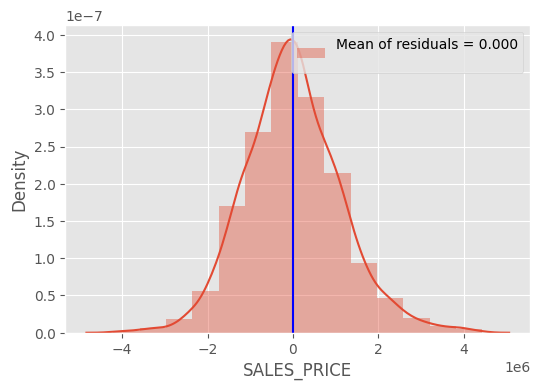

In [ ]:
# User defined function for histogram of the errors obtained in the predicted values.
def hist_residuals(y_actual,y_predicted):
  residuals = y_actual-y_predicted
  print(f"Mean of residuals = {np.mean(residuals):.3f}\n")

  plt.figure(figsize = (6, 4))
  sns.distplot(residuals, bins = 'sturges',
              label = f"Mean of residuals = {np.mean(residuals):.3f}\n")
  plt.axvline(x = np.mean(residuals), color = 'blue')
  plt.legend()
  plt.show()

# For the training dataset.
hist_residuals(y_train,y_train_predict)


Inference From the above graph:

Shape of the cure : Bell curve.
The mean of residuals is zero which is a good thing.


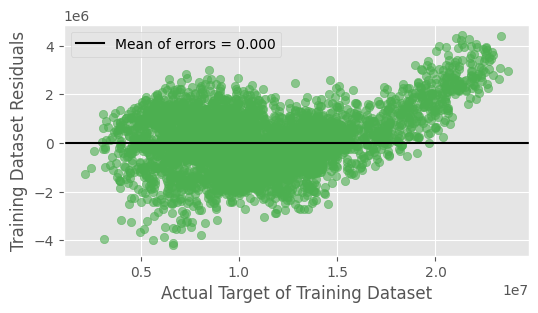

In [ ]:
# Scatter plot between 'train_residuals' and 'y_train'.
train_residuals = y_train - y_train_predict
plt.figure(figsize = (6, 3))
plt.scatter(y_train, train_residuals, color ="#4CAF50", alpha=0.6)
plt.xlabel("Actual Target of Training Dataset")
plt.ylabel("Training Dataset Residuals")
plt.axhline(y = train_residuals.mean(), color = 'k', 
            label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

Inference From the above graph:

The above graph clearly indicates the presence of Heteroscedasticity towards the end i.e., the variance of the residuals in training dataset is unequal.

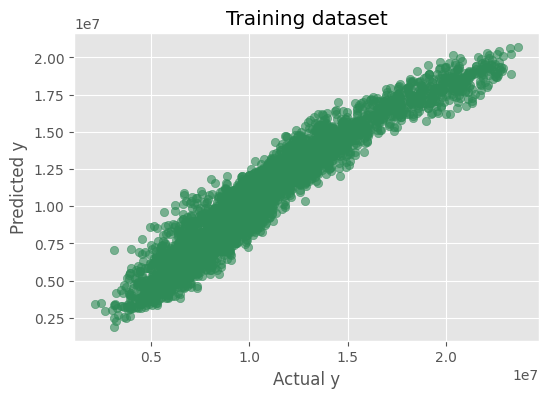

In [ ]:
# Scatter plot for actual values and predictions of the training dataset.
plt.figure(figsize = (6, 4))
plt.title('Training dataset')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.scatter(y_train, y_train_predict, color="seagreen", alpha=0.6)
plt.show()

Inference From the above graph:

This scatter plot between the actual and predicted prices almost follow a straight line which suggests the predicted prices are quite close to the actual prices.


Testing Dataset

Mean of residuals = -80895.956



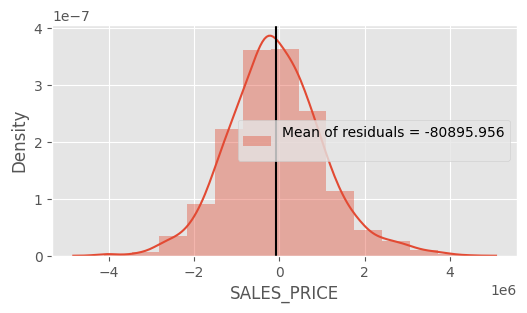

In [ ]:
#Histogram for the errors obtained in the predicted values for the test set.
hist_residuals(y_test,y_test_predict)

Inference From the above graph:

Shape of the cure : Bell curve.
The mean of residuals should have been zero,but unfortunately it is a huge value and not equal to zero.

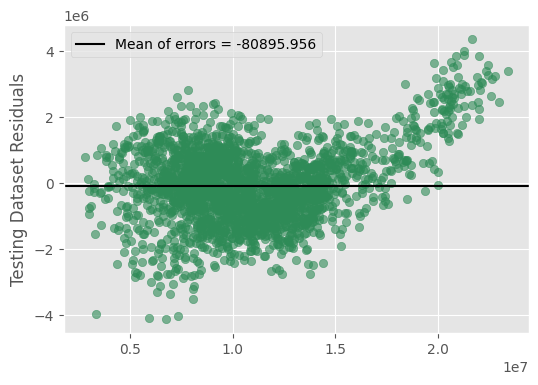

In [ ]:
# Scatter plot between 'test_residuals' and 'y_test'.
plt.figure(figsize = (6, 4))
test_residuals = y_test - y_test_predict
plt.scatter(y_test, test_residuals, color ="seagreen", alpha=0.6)
plt.ylabel("Testing Dataset Residuals")
plt.axhline(y = test_residuals.mean(), color = 'k', 
            label = f'Mean of errors = {test_residuals.mean():.3f}')
plt.legend()
plt.show()

Inference From the above graph:

The above graph clearly indicates the presence of Heteroscedasticity towards the end i.e., the variance of the residuals in testing dataset is unequal.


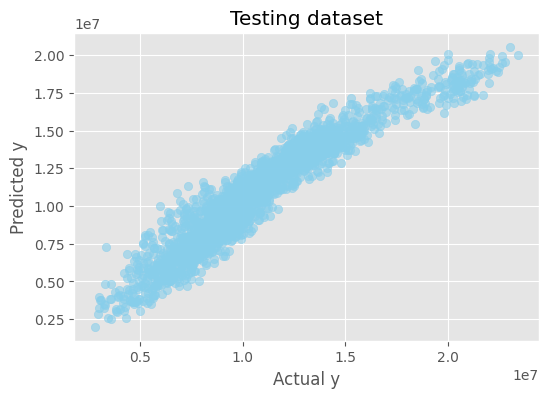

In [ ]:
# Scatter plot for actual values and predictions of the testing dataset.
plt.figure(figsize = (6, 4))
plt.title('Testing dataset')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.scatter(y_test, y_test_predict, color="skyblue", alpha=0.6)
plt.show()


Inference From the above graph:

This scatter plot between the actual and predicted prices of testing dataset almost follow a straight line which suggests the predicted prices are quite close to the actual prices.
But the errors observed were very high and there was presence of Heteroscedasticity.
Due to the above reasons linear regression seems to be an average to good model for Chennai house price prediction problem.


In [ ]:
# Standard deviation of the actual values in testing dataset.
std_actual = y_test.std()
std_actual


3682014.3610142875

Range of predicted Chennai house prices


In [ ]:
# Range of Predicted values of House.
pred_range_lr = pd.DataFrame()
pred_range_lr["Actual Price"] = y_test
pred_range_lr["Predicted Price"] = y_test_predict
pred_range_lr["Lower Limit Of Predicted Price"] = y_test_predict - std_actual
pred_range_lr["Higher Limit Of Predicted Price"] = y_test_predict + std_actual
pred_range_lr.index = np.arange(len(y_test))
pred_range_lr.head()


Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200     1.242473e+07                    8.742715e+06   
1       7524750     7.676044e+06                    3.994030e+06   
2      16434500     1.730474e+07                    1.362272e+07   
3       6705750     6.349632e+06                    2.667618e+06   
4      15831550     1.488539e+07                    1.120337e+07   

   Higher Limit Of Predicted Price  
0                     1.610674e+07  
1                     1.135806e+07  
2                     2.098675e+07  
3                     1.003165e+07  
4                     1.856740e+07

In [ ]:
# Step 1: Define the space over which hyperopt will search for optimal hyperparameters.

#Import 'scope' from hyperopt in order to obtain int values for certain hyperparameters.
from hyperopt.pyll.base import scope
space = {
        "max_depth": scope.int(hp.quniform("max_depth", 2, 21, 1)),
        'n_estimators':hp.choice('n_estimators', np.arange(200, 5000, 10, dtype=int)),
        'eta':hp.quniform('eta', 0.01, 0.3, 0.1),
        'max_featuers': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
        'objective':'reg:squarederror',
        'eval_metric': "rmse",
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split': hp.uniform('min_samples_split', 0, 1) 
        }

In [ ]:
# Step 2: Define the hyperopt objective function
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(**space)
    
    # Define evaluation datasets.
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    # Fit the model. Define evaluation sets, early_stopping_rounds, and eval_metric.
    model.fit(X_train, y_train, eval_set=evaluation,
              verbose=False, early_stopping_rounds=10, eval_metric="rmse",)
    
    # Obtain prediction and rmse score.
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False) # if squared = False, it returns RMSE.
    print("SCORE:", rmse)
    
    # Specify what the loss is for each model.
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

In [ ]:
#Step 3: Optimization algorithm
trials = Trials() # Trials - This is the 'database' which stores the completed hyper-parameters and the score.

best_hyperparams = fmin(fn = hyperparameter_tuning,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
527254.2653012796
SCORE:
524537.1417504686
SCORE:
468387.34844253695
SCORE:
503738.30252532806
SCORE:
529391.162379824
SCORE:
530475.3124888982
SCORE:
529391.162379824
SCORE:
523629.78208470164
SCORE:
468387.34844253695
SCORE:
512780.5538209091
SCORE:
475543.9371189583
SCORE:
470137.28377384355
SCORE:
492444.29847009294
SCORE:
526696.834032368
SCORE:
512780.5538209091
SCORE:
529391.162379824
SCORE:
523629.78208470164
SCORE:
468387.34844253695
SCORE:
485418.9550982421
SCORE:
468387.34844253695
SCORE:
539156.0254540974
SCORE:
481336.453972322
SCORE:
485418.9550982421
SCORE:
478410.7052489018
SCORE:
501824.12653349
SCORE:
481336.453972322
SCORE:
497153.26268188
SCORE:
475543.9371189583
SCORE:
501824.12653349
SCORE:
529444.6351492384
SCORE:
470137.28377384355
SCORE:
478410.7052489018
SCORE:
492444.29847009294
SCORE:
470137.28377384355
SCORE:
475543.9371189583
SCORE:
530475.3124888982
SCORE:
481336.453972322
SCORE:
503738.30252532806
SCORE:
468387.34844253695
SCORE:
485418.9550982421

In [ ]:
# Best hyperparameters obtained(optimal parameters that best fit the XGBoost Regressor model & better loss function value)
print("The best hyperparameters are :\n")
print(best_hyperparams)

The best hyperparameters are :

{'eta': 0.1, 'max_depth': 5.0, 'max_features': 0, 'min_samples_leaf': 0.42727556355497076, 'min_samples_split': 0.23250399657605736, 'n_estimators': 233}


In [ ]:
# Building and fitting the XGBoost Regression Model using the best parameters.
xgr = xgb.XGBRegressor(objective='reg:squarederror',
                       min_samples_leaf = 0.4796713789930546,
                       min_samples_split = 0.9593383148452455,
                       eta = 0.0, max_depth = 3, max_features = 3,
                       min_child_weight = 0, n_estimators = 354,
                       subsample = 0.9, eval_metric='rmse').fit(X_train, y_train)

# Perform prediction using 'predict()' function.
y_train_pred_xgr = xgr.predict(X_train)
y_test_pred_xgr = xgr.predict(X_test)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", xgr.score(X_train, y_train))
print("Test set accuracy:", xgr.score(X_test, y_test))

Train set accuracy: 0.9863092545248137
Test set accuracy: 0.982053389113141


In [ ]:
# Evaluate XGBoost Regression Model using RMSE, MAE and MSLE values.
print(f"Train Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred_xgr)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_train, y_train_pred_xgr):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_train, y_train_pred_xgr):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_xgr)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_test_pred_xgr):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_test, y_test_pred_xgr):.3f}")


Train Set
--------------------------------------------------
Root mean squared error(RMSE): 445829.885
Mean Absolute Error(MAE): 332648.059
Mean Squared Log Error(MSLE): 0.003


Test Set
--------------------------------------------------
Root mean squared error(RMSE): 493155.773
Mean Absolute Error(MAE): 371827.336
Mean Squared Log Error(MSLE): 0.004


Inference: Mean Squared Log Error(MSLE) for both training and testing datasets are quite low(0.001).

Note: matplotlib.rcParams is a matplotlib.RcParams object, it is a dictionary-like variable which store some rc settings in matplotlib. We can use it to control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on.

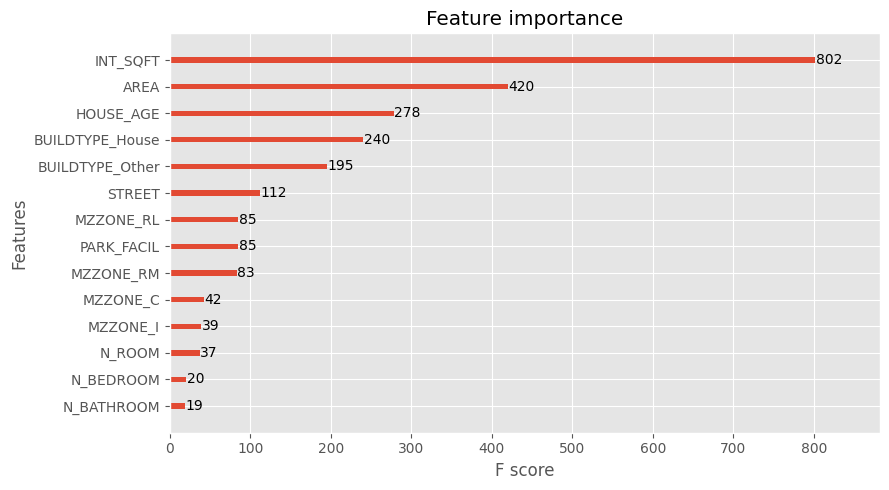

In [ ]:
# Examining the importance of each feature column in the original dataset within the model by plotting the feature importances.
xgb.plot_importance(xgr)
plt.rcParams['figure.figsize'] = [9, 4] 
plt.tight_layout()
plt.show()

Inference From the above graph:

Here, we are counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear.
As we can see, 'INT_SQFT' column has been given the highest importance score among all the features. Thus, XGBoost also gives you a way to do Feature Selection.

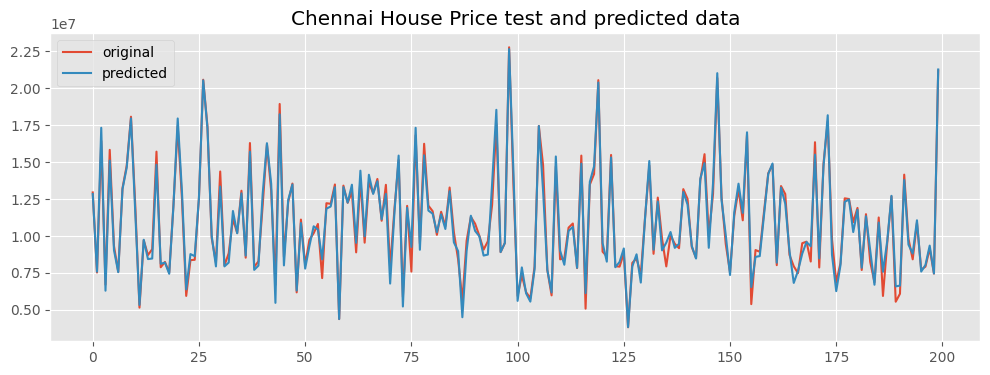

In [ ]:
# Visualizing the original and predicted values of testing dataset in a plot to compare visually.
# Plotted only the 1st 200 values for better visualization.
plt.figure(figsize=(12,4))
x_ax = range(200)
plt.plot(x_ax, y_test[:200], label="original")
plt.plot(x_ax, y_test_pred_xgr[:200], label="predicted")
plt.title("Chennai House Price test and predicted data")
plt.legend()
plt.show()

Inference From the above graph:

We can see that the actual y values and predicted y values for the testing dataset is almost overlapping each other.
This indicates that the difference between actual and predicted values are minimum.


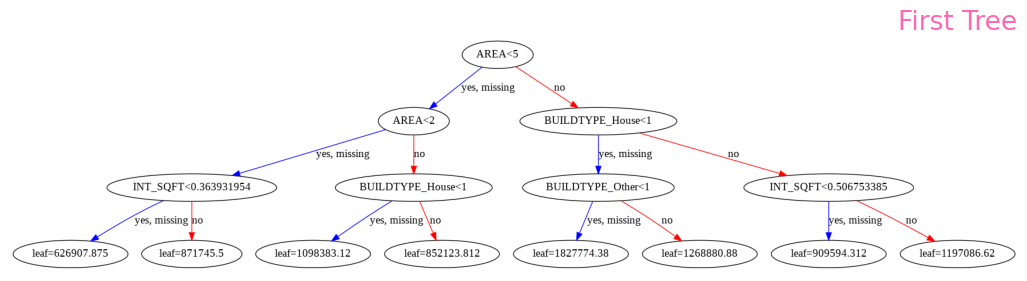

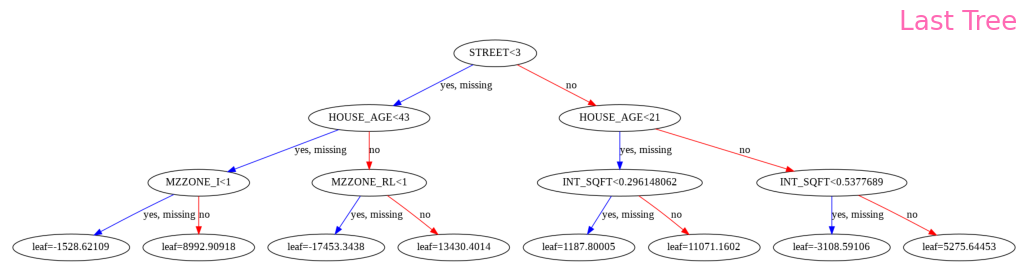

In [ ]:
# Plotting the first tree
fig, ax = plt.subplots(figsize=(13, 13))
ax.set_title("First Tree", color="hotpink", loc="right",fontsize=19)
xgb.plot_tree(xgr, num_trees=0, ax=ax)
plt.show()

# Plotting the last tree
fig, ax = plt.subplots(figsize=(13, 13))
ax.set_title("Last Tree", color="hotpink", loc="right",fontsize=19)
xgb.plot_tree(xgr, num_trees=132, ax=ax)
plt.show()

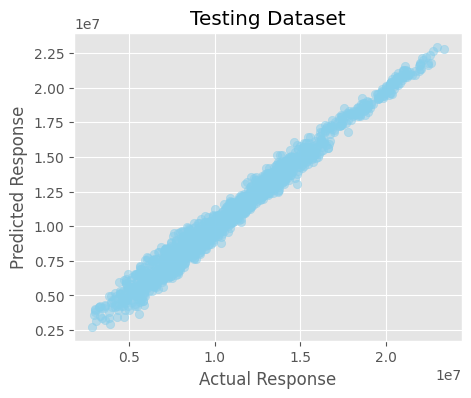

In [ ]:
# Scatter plot between actual and predicted values of target.
plt.figure(figsize=(5,4))
plt.title("Testing Dataset", color="black")
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")
plt.scatter(y_test,y_test_pred_xgr, color = 'skyblue', alpha=0.5)
plt.show()

Range of predicted Chennai house prices


In [ ]:
# Range of Predicted values of House.
pred_range_xgbr = pd.DataFrame()
pred_range_xgbr["Actual Price"] = y_test
pred_range_xgbr["Predicted Price"] = y_test_pred_xgr
pred_range_xgbr["Lower Limit Of Predicted Price"] = y_test_pred_xgr - std_actual
pred_range_xgbr["Higher Limit Of Predicted Price"] = y_test_pred_xgr + std_actual
pred_range_xgbr.index = np.arange(len(y_test))
pred_range_xgbr.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200       12839840.0                      9157826.00   
1       7524750        7580776.0                      3898761.75   
2      16434500       17327842.0                     13645828.00   
3       6705750        6293332.0                      2611317.75   
4      15831550       15110694.0                     11428680.00   

   Higher Limit Of Predicted Price  
0                       16521854.0  
1                       11262790.0  
2                       21009856.0  
3                        9975346.0  
4                       18792708.0

Conclusion:
XGBoost Regression Model gave the best results in predicting Chennai house prices. 
The accuracy of the model is high as compare to linear regression.